In [60]:
# 8_alt_plots_splicing.ipynb
# Ashley Mae Conard
# Last Mod. 9/12/2019
# Purpose: Alternative code base to plot transcript abundance using PSI and DTU measures.

import pandas as pd
pd.set_option('display.max_colwidth',-1)
import glob
import collections as c
import os
import sys
from scipy import stats
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
from matplotlib_venn import venn2
import numpy as np

In [61]:
# dPSI
# split by up and down reg.


In [63]:
# MUST CHANGE
TITLE_OUTPUT = "2-4_m"
TITLE_PLOT = "2-4 Male clamp RNAi vs. Control"#vs. Male Controls" 
GENES_GTF = "/Users/ashleymaeconard/Desktop/genes.gtf"
# CAN CHANGE
OUTDIR = "/Users/ashleymaeconard/Desktop/SUPPA_outputs/merged_"+TITLE_OUTPUT+"/"
OUTDIR_BOX = "/Users/ashleymaeconard/Desktop/SUPPA_outputs/"

## PSI plots

/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


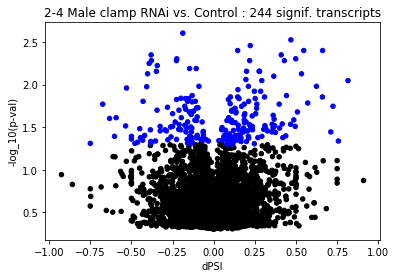

In [64]:
INPUTFILE_PSI = OUTDIR+"/clampRNAi_diffSplice.dpsi"

dfpsi = pd.read_csv(INPUTFILE_PSI, sep="\t")
dfpsi["nlog10_pval"] = -np.log10(dfpsi["clampRNAi_iso_events-control_iso_events_p-val"])

cols = np.where(dfpsi["nlog10_pval"]>=1.301029995664,'b','k') # p-val 0.05
dfpsi.plot.scatter(c = cols, x='clampRNAi_iso_events-control_iso_events_dPSI',
                   y='nlog10_pval')

plt.title('%s : %s signif. transcripts'%(TITLE_PLOT, cols.tolist().count('b')))
plt.xlabel("dPSI")
plt.ylabel('-log_10(p-val)')
 
# Show graphic
plt.savefig(OUTDIR+"/"+TITLE_OUTPUT+"_volcano_PSI.pdf")

## DTU plots

/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


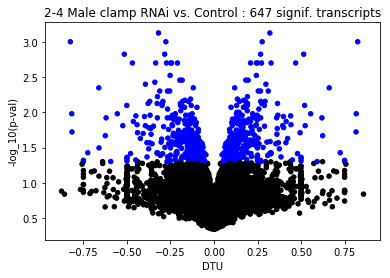

In [65]:
INPUTFILE_DTU = OUTDIR+"/clampRNAi_diffSplice_iso_dtu.dpsi"

dfdtu = pd.read_csv(INPUTFILE_DTU, sep="\t")
dfdtu["nlog10_pval"] = -np.log10(dfdtu["clampRNAi_iso_tpm-control_iso_tpm_p-val"])

cols = np.where(dfdtu["nlog10_pval"]>=1.301029995664,'b','k') # p-val 0.05
dfdtu.plot.scatter(c = cols, x='clampRNAi_iso_tpm-control_iso_tpm_dPSI',
                   y='nlog10_pval')

plt.title('%s : %s signif. transcripts'%(TITLE_PLOT, cols.tolist().count('b')))
plt.xlabel("DTU")
plt.ylabel('-log_10(p-val)')
 
# Show graphic
plt.savefig(OUTDIR+"/"+TITLE_OUTPUT+"_volcano_DTU.pdf")

## Functions for intersection, creating nan dataframe, defining split for dPSI

In [74]:
def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 

nans = lambda df: df[df.isnull().any(axis=1)]

pos_neg = ["b","p","n"]

## Boxplots

# PSI data prep

In [86]:
pval = "clampRNAi_iso_events-control_iso_events_p-val"
PSI = "clampRNAi_iso_events-control_iso_events_dPSI" 

female_input_0_2_f = OUTDIR_BOX+"/merged_0-2_f/clampRNAi_diffSplice.dpsi"
male_input_0_2_m = OUTDIR_BOX+"/merged_0-2_m/clampRNAi_diffSplice.dpsi"

controls_input_0_2_cf_cm = OUTDIR_BOX+"/merged_0-2_cf_cm/clampRNAi_diffSplice.dpsi"

female_input_2_4_f = OUTDIR_BOX+"/merged_2-4_f/clampRNAi_diffSplice.dpsi"
male_input_2_4_m = OUTDIR_BOX+"/merged_2-4_m/clampRNAi_diffSplice.dpsi"

controls_input_2_4_cf_cm = OUTDIR_BOX+"/merged_2-4_cf_cm/clampRNAi_diffSplice.dpsi"

df_0_2f = pd.read_csv(female_input_0_2_f, sep="\t")
df_0_2fp = df_0_2f[df_0_2f["clampRNAi_iso_events-control_iso_events_dPSI"] > 0.0]
df_0_2fn = df_0_2f[df_0_2f["clampRNAi_iso_events-control_iso_events_dPSI"] < 0.0]
df_0_2fz = df_0_2f[df_0_2f["clampRNAi_iso_events-control_iso_events_dPSI"] == 0.0]

df_0_2m = pd.read_csv(male_input_0_2_m, sep="\t")
df_0_2mp = df_0_2m[df_0_2m["clampRNAi_iso_events-control_iso_events_dPSI"] > 0.0]
df_0_2mn = df_0_2m[df_0_2m["clampRNAi_iso_events-control_iso_events_dPSI"] < 0.0]
df_0_2mz = df_0_2m[df_0_2m["clampRNAi_iso_events-control_iso_events_dPSI"] == 0.0]

df_0_2_cf_cm = pd.read_csv(controls_input_0_2_cf_cm, sep="\t")

df_2_4f = pd.read_csv(female_input_2_4_f, sep="\t")
df_2_4fp = df_2_4f[df_2_4f["clampRNAi_iso_events-control_iso_events_dPSI"] > 0.0]
df_2_4fn = df_2_4f[df_2_4f["clampRNAi_iso_events-control_iso_events_dPSI"] < 0.0]
df_2_4fz = df_2_4f[df_2_4f["clampRNAi_iso_events-control_iso_events_dPSI"] == 0.0]

df_2_4m = pd.read_csv(male_input_2_4_m, sep="\t")
df_2_4mp = df_2_4m[df_2_4m["clampRNAi_iso_events-control_iso_events_dPSI"] > 0.0]
df_2_4mn = df_2_4m[df_2_4m["clampRNAi_iso_events-control_iso_events_dPSI"] < 0.0]
df_2_4mz = df_2_4m[df_2_4m["clampRNAi_iso_events-control_iso_events_dPSI"] == 0.0]

df_2_4_cf_cm = pd.read_csv(controls_input_2_4_cf_cm, sep="\t")

In [82]:
# Sanity check for sizes
print(df_0_2f.shape)
print(nans(df_0_2f).shape)
print(df_0_2fp.shape)
print(df_0_2fn.shape)
print(df_0_2fz.shape)

(16292, 2)
(6748, 2)
(4781, 2)
(4188, 2)
(575, 2)


# 0-2 PSI

Running on both positive and negative dPSI.


/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

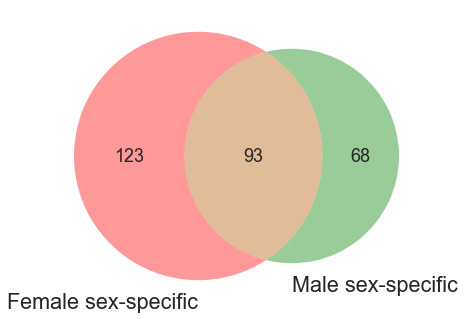

/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

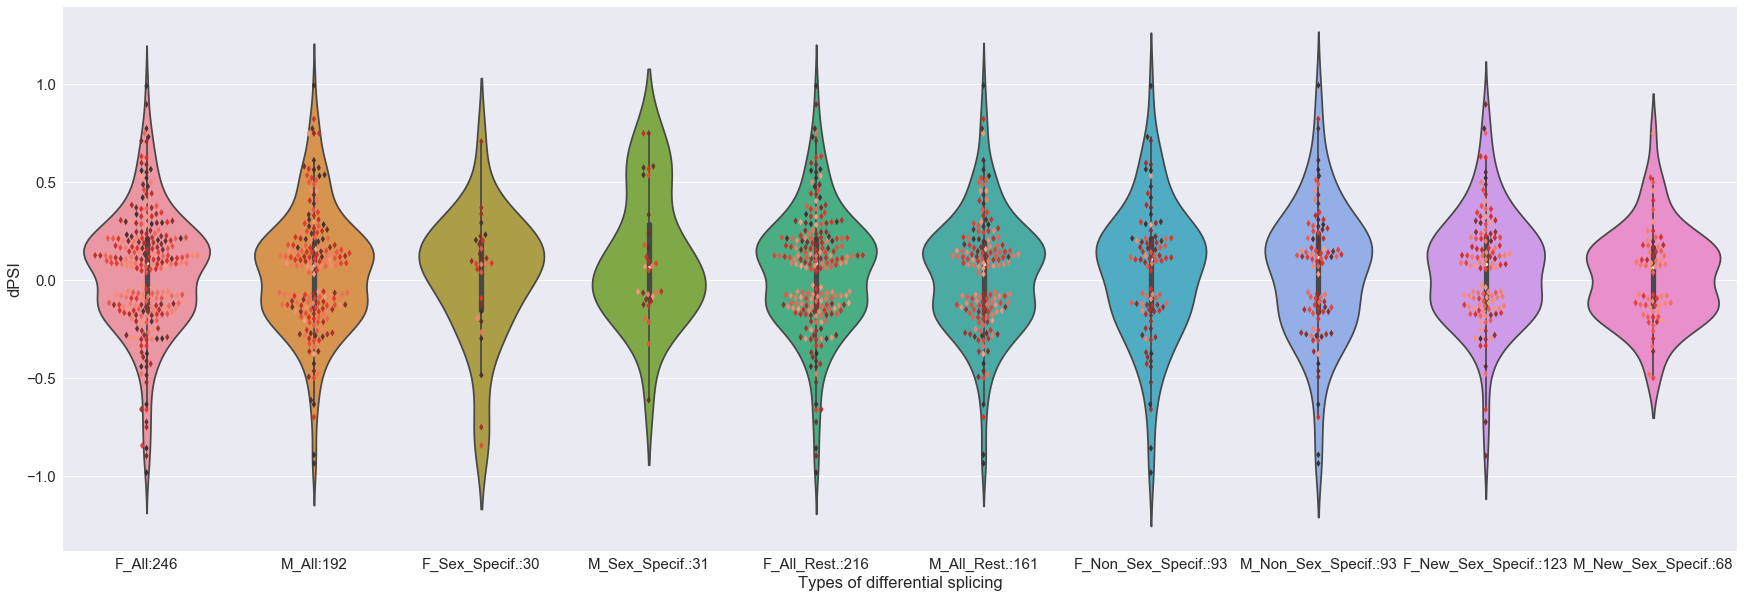

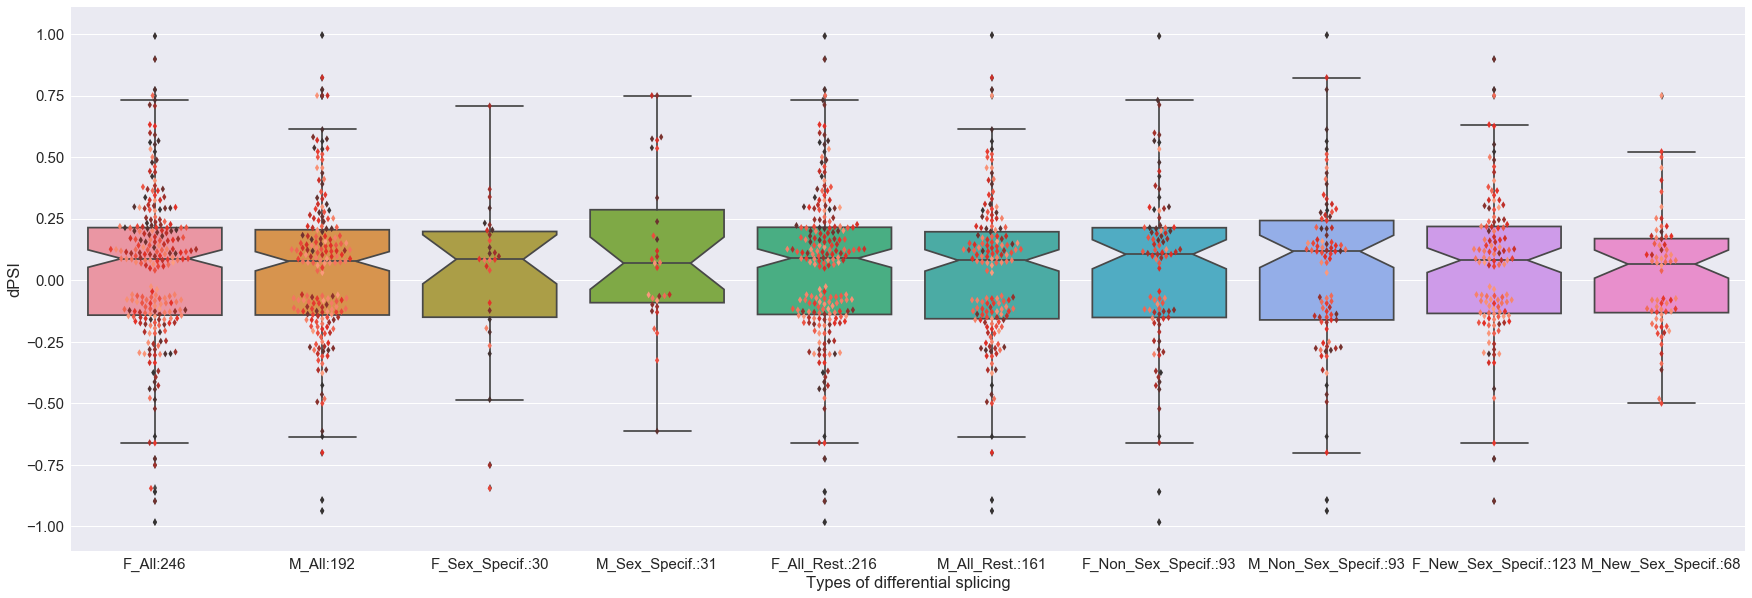

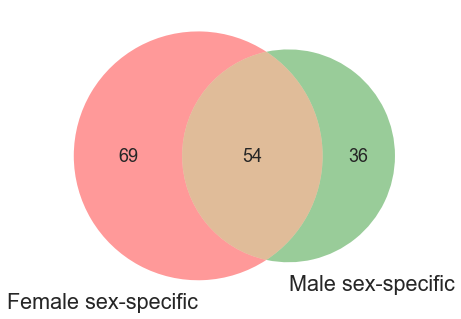

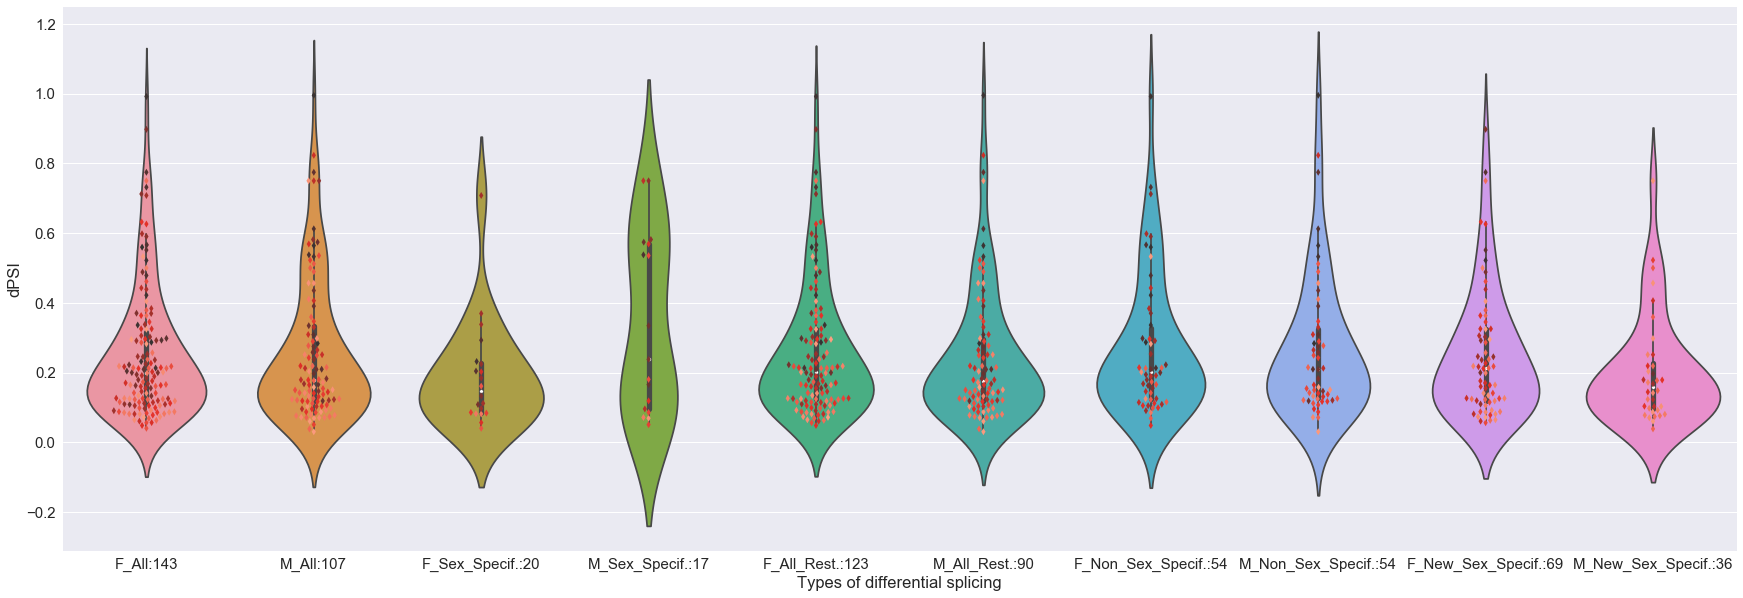

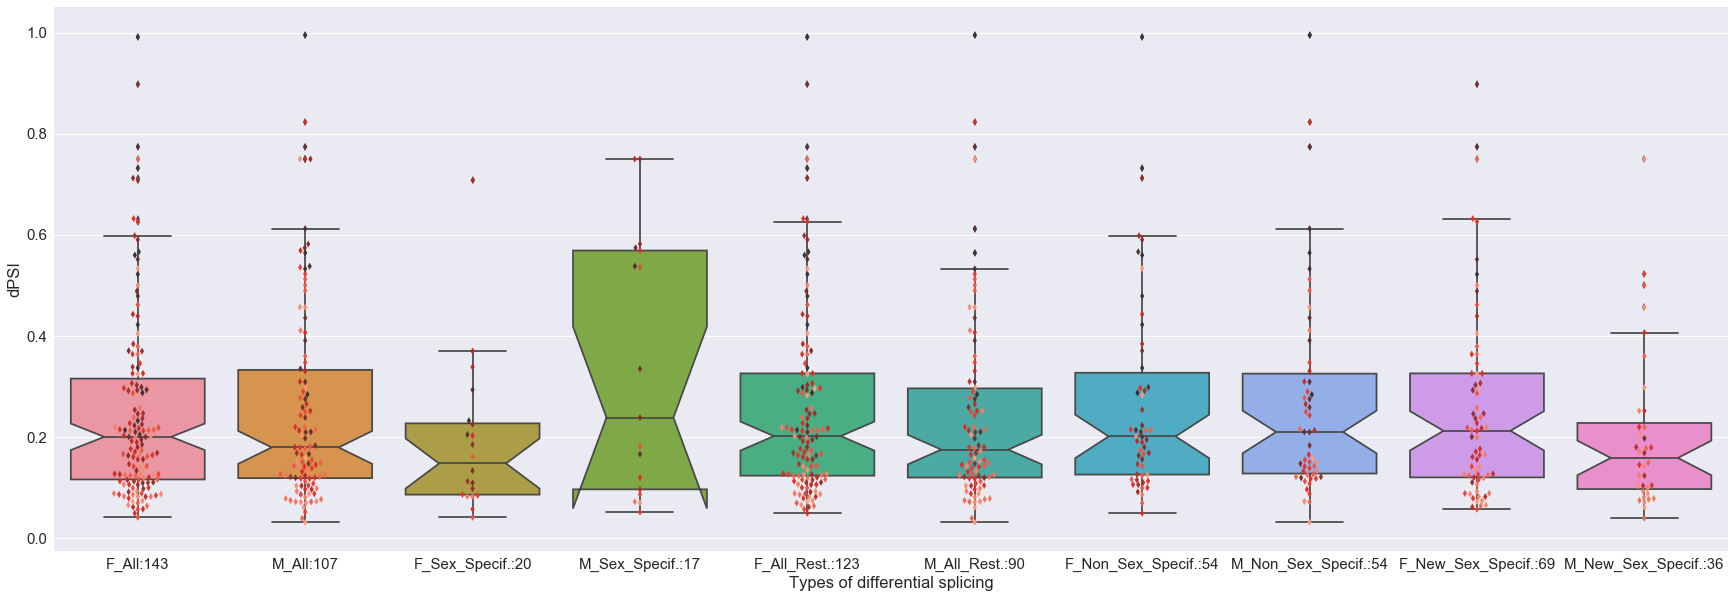

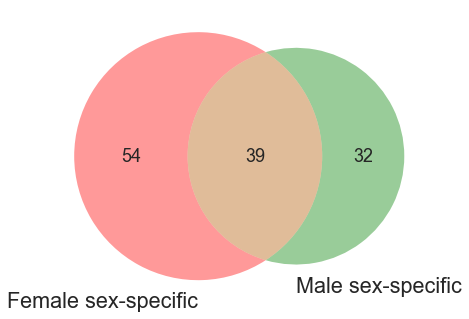

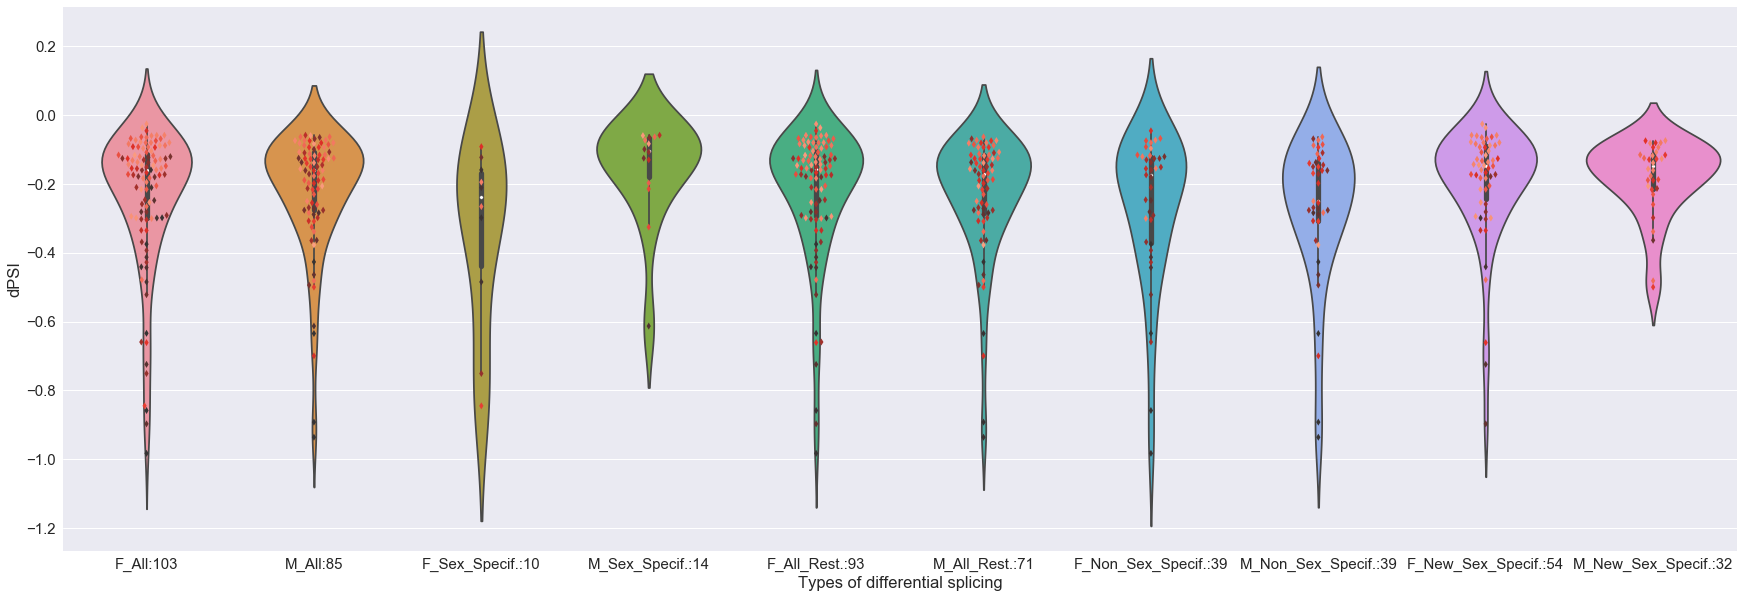

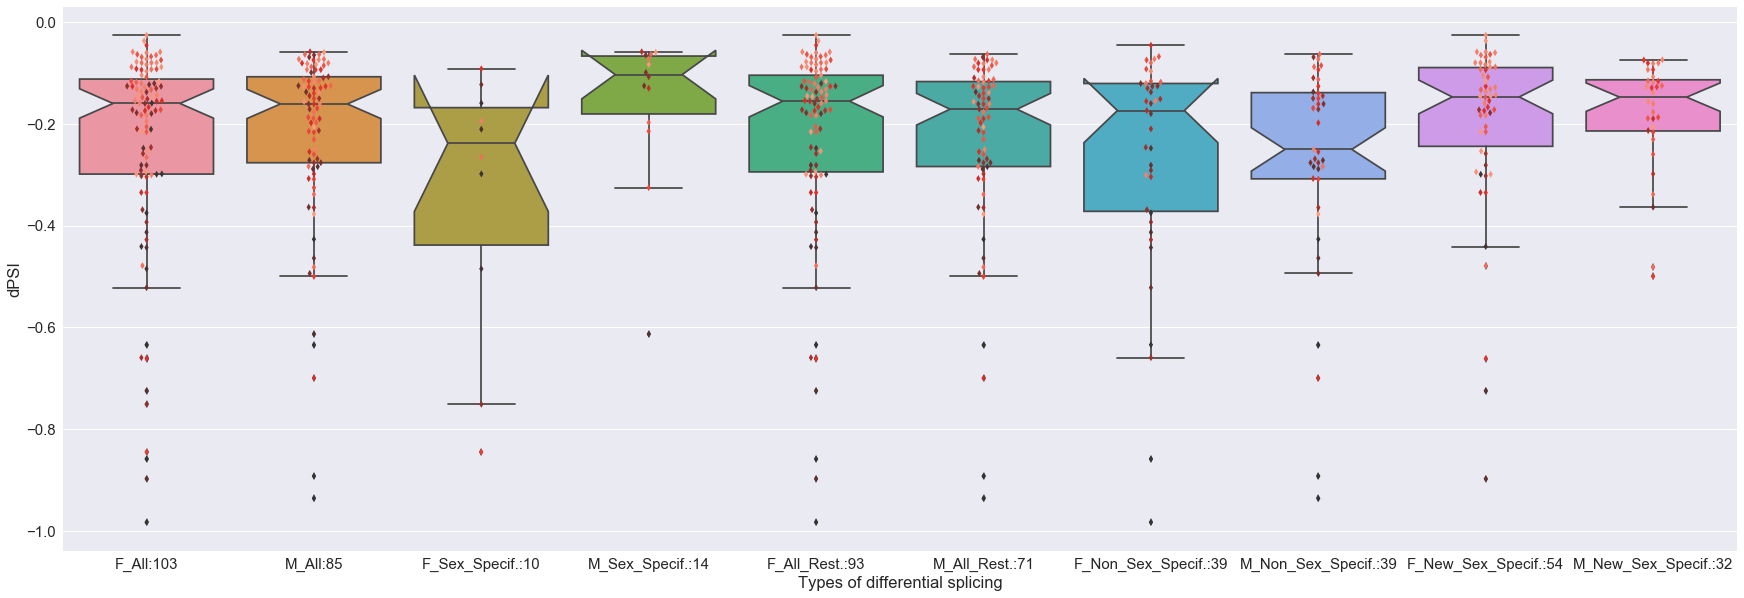

In [83]:
TIME="0_2"

for i in pos_neg:
    if i=="b":
        print("Running on both positive and negative dPSI.")
    elif i=="p": # positive set
        df_0_2f=df_0_2fp
        df_0_2m=df_0_2mp
    else: # negative set
        df_0_2f=df_0_2fn
        df_0_2m=df_0_2mn
    
    # All genes that are sex specific from controls
    df_0_2_cf_cm_filt = df_0_2_cf_cm[df_0_2_cf_cm[pval]<=0.05]
    controls_list_ss_filt = df_0_2_cf_cm_filt.index.values.tolist() 

    # keep only the rows in the controls_input_0_2_cf_cm to get sex specific
    df_0_2_f_ss = df_0_2f[df_0_2f.index.isin(controls_list_ss_filt)]
    df_0_2_m_ss = df_0_2m[df_0_2m.index.isin(controls_list_ss_filt)]

    # All other genes that are significant but not sex specific genes
    df_0_2_f_ar = df_0_2f[~df_0_2f.index.isin(controls_list_ss_filt)]
    df_0_2_m_ar = df_0_2m[~df_0_2m.index.isin(controls_list_ss_filt)]

    # New sex specific thus are significant but not in sex specifc list (thus diff. btw males and females in comparisons)
    df_0_2f_newss1 = df_0_2f[~df_0_2f.index.isin(controls_list_ss_filt)]
    df_0_2m_newss1 = df_0_2m[~df_0_2m.index.isin(controls_list_ss_filt)]

    df_0_2f_newss1_list = df_0_2f_newss1.index.values.tolist() 
    df_0_2m_newss1_list = df_0_2m_newss1.index.values[:-5000].tolist() 

    # venn of overlapping ss in f and m

    # 0-2 F vs. M all
    df_0_2f_filt = df_0_2f[df_0_2f[pval]<=0.05]
    df_0_2f_filt['sex'] = 'F_All:%s'%len(df_0_2f_filt)
    df_0_2m_filt = df_0_2m[df_0_2m[pval]<=0.05]
    df_0_2m_filt['sex'] = 'M_All:%s'%len(df_0_2m_filt)

    df1 = df_0_2f_filt.append(df_0_2m_filt)

    # 0-2 Sex specific thus control F vs. M for list then filter those genes
    df_0_2f_filt_ss = df_0_2_f_ss[df_0_2_f_ss[pval]<=0.05]
    df_0_2f_filt_ss['sex'] = 'F_Sex_Specif.:%s'%len(df_0_2f_filt_ss)
    df_0_2m_filt_ss = df_0_2_m_ss[df_0_2_m_ss[pval]<=0.05]
    df_0_2m_filt_ss['sex'] = 'M_Sex_Specif.:%s'%len(df_0_2m_filt_ss)

    df2 = df1.append(df_0_2f_filt_ss)
    df3 = df2.append(df_0_2m_filt_ss)

    # 0-2 All rest 
    df_0_2f_filt_ar = df_0_2_f_ar[df_0_2_f_ar[pval]<=0.05]
    df_0_2f_filt_ar['sex'] = 'F_All_Rest.:%s'%len(df_0_2f_filt_ar)
    df_0_2m_filt_ar = df_0_2_m_ar[df_0_2_m_ar[pval]<=0.05]
    df_0_2m_filt_ar['sex'] = 'M_All_Rest.:%s'%len(df_0_2m_filt_ar)

    df_0_2f_filt_ar_list = df_0_2f_filt_ar.index.values.tolist() 
    df_0_2m_filt_ar_list = df_0_2m_filt_ar.index.values.tolist() 

    df4 = df3.append(df_0_2f_filt_ar)
    df5 = df4.append(df_0_2m_filt_ar) 

    # Venn diagram between them
    venn2([set(df_0_2f_filt_ar_list), set(df_0_2m_filt_ar_list)],
          set_labels = ('Female sex-specific', 'Male sex-specific'))
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_venn_PSI.pdf")
    plt.show()

    # 0-2 NOT sex specific thus ~control F vs. M list then filter those genes
    df_0_2filt_nss_list = intersection(df_0_2f_filt_ar_list, df_0_2m_filt_ar_list)
    df_0_2f_filt_nss = df_0_2f_filt_ar[df_0_2f_filt_ar.index.isin(df_0_2filt_nss_list)]
    df_0_2f_filt_nss['sex'] = 'F_Non_Sex_Specif.:%s'%len(df_0_2f_filt_nss)
    df_0_2m_filt_nss = df_0_2m_filt_ar[df_0_2m_filt_ar.index.isin(df_0_2filt_nss_list)]
    df_0_2m_filt_nss['sex'] = 'M_Non_Sex_Specif.:%s'%len(df_0_2m_filt_nss)

    df6 = df5.append(df_0_2f_filt_nss)
    df7 = df6.append(df_0_2m_filt_nss)

    # 0-2 New sex specific thus ~control F vs. M list then filter those gene
    df_0_2f_filt_newss_list = list(set(df_0_2f_filt_ar_list) - set(df_0_2m_filt_ar_list))
    df_0_2f_filt_newss = df_0_2f_filt_ar[df_0_2f_filt_ar.index.isin(df_0_2f_filt_newss_list)]
    df_0_2f_filt_newss['sex'] = 'F_New_Sex_Specif.:%s'%len(df_0_2f_filt_newss)

    df_0_2m_filt_newss_list = list(set(df_0_2m_filt_ar_list) - set(df_0_2f_filt_ar_list))
    df_0_2m_filt_newss = df_0_2m_filt_ar[df_0_2m_filt_ar.index.isin(df_0_2m_filt_newss_list)]
    df_0_2m_filt_newss['sex'] = 'M_New_Sex_Specif.:%s'%len(df_0_2m_filt_newss)

    df8 = df7.append(df_0_2f_filt_newss)
    df9_0_2_psi = df8.append(df_0_2m_filt_newss)

    #### Plots 
    sns.set(style="whitegrid")
    # Make boxplot for one group only
    sns.set(font_scale = 1.5)
    f = plt.figure(figsize=(30,10))
    ax = f.add_subplot(111)
    #pal = sns.palplot(sns.light_palette("navy", reverse=True))

    sns.set_palette("Paired")
    sns.violinplot( x="sex", y=PSI, data=df9_0_2_psi)

    # sequential_colors = sns.color_palette("RdPu", 100)
    # sns.palplot(sequential_colors)

    sns.swarmplot( x="sex", y=PSI, color='red', marker="d", hue=pval, data=df9_0_2_psi, palette="Reds_d")
    ax.get_legend().set_visible(False)
    ax.set(xlabel='Types of differential splicing', ylabel='dPSI')
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_violin_PSI.pdf")
    sns.plt.show()

    sns.set(style="whitegrid")
    # Make boxplot for one group only
    sns.set(font_scale = 1.5)
    f = plt.figure(figsize=(30,10))
    ax = f.add_subplot(111)
    #pal = sns.palplot(sns.light_palette("navy", reverse=True))

    sns.set_palette("Paired")
    sns.boxplot( x="sex", y=PSI, data=df9_0_2_psi, notch="TRUE")

    sns.swarmplot( x="sex", y=PSI, color='red', marker="d", hue=pval, data=df9_0_2_psi, palette="Reds_d")
    ax.get_legend().set_visible(False)
    ax.set(xlabel='Types of differential splicing', ylabel='dPSI')
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_boxplot_PSI.pdf")
    sns.plt.show()

    #### K-S Tests
    with open(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_ksTest_PSI.txt", 'w') as f:
        # All
        psi_f_all = np.asarray(df_0_2f_filt[PSI])
        psi_m_all = np.asarray(df_0_2m_filt[PSI])
        print >> f, "All K-S Test: ", stats.ks_2samp(psi_f_all, psi_m_all)

        # Sex specific
        psi_f_ss = np.asarray(df_0_2f_filt_ss[PSI])
        psi_m_ss = np.asarray(df_0_2m_filt_ss[PSI])
        print >> f, "Sex specific K-S Test: ", stats.ks_2samp(psi_f_ss, psi_m_ss)

        # All rest
        psi_f_ar = np.asarray(df_0_2f_filt_ar[PSI])
        psi_m_ar = np.asarray(df_0_2m_filt_ar[PSI])
        print >> f, "All rest K-S Test: ", stats.ks_2samp(psi_f_ar, psi_m_ar)

        # Non-sex specif.
        psi_f_nss = np.asarray(df_0_2f_filt_nss[PSI])
        psi_m_nss = np.asarray(df_0_2m_filt_nss[PSI])
        print >> f, "Non-sex specific K-S Test: ", stats.ks_2samp(psi_f_nss, psi_m_nss)

        # New sex specif.
        psi_f_newss = np.asarray(df_0_2f_filt_newss[PSI])
        psi_m_newss = np.asarray(df_0_2m_filt_newss[PSI])
        print >> f, "New sex specific K-S Test: ", stats.ks_2samp(psi_f_newss, psi_m_newss)


# 2-4 PSI

Running on both positive and negative dPSI.


/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

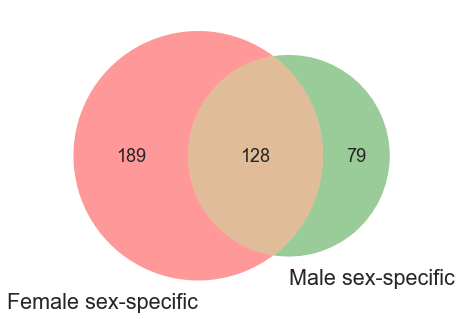

/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

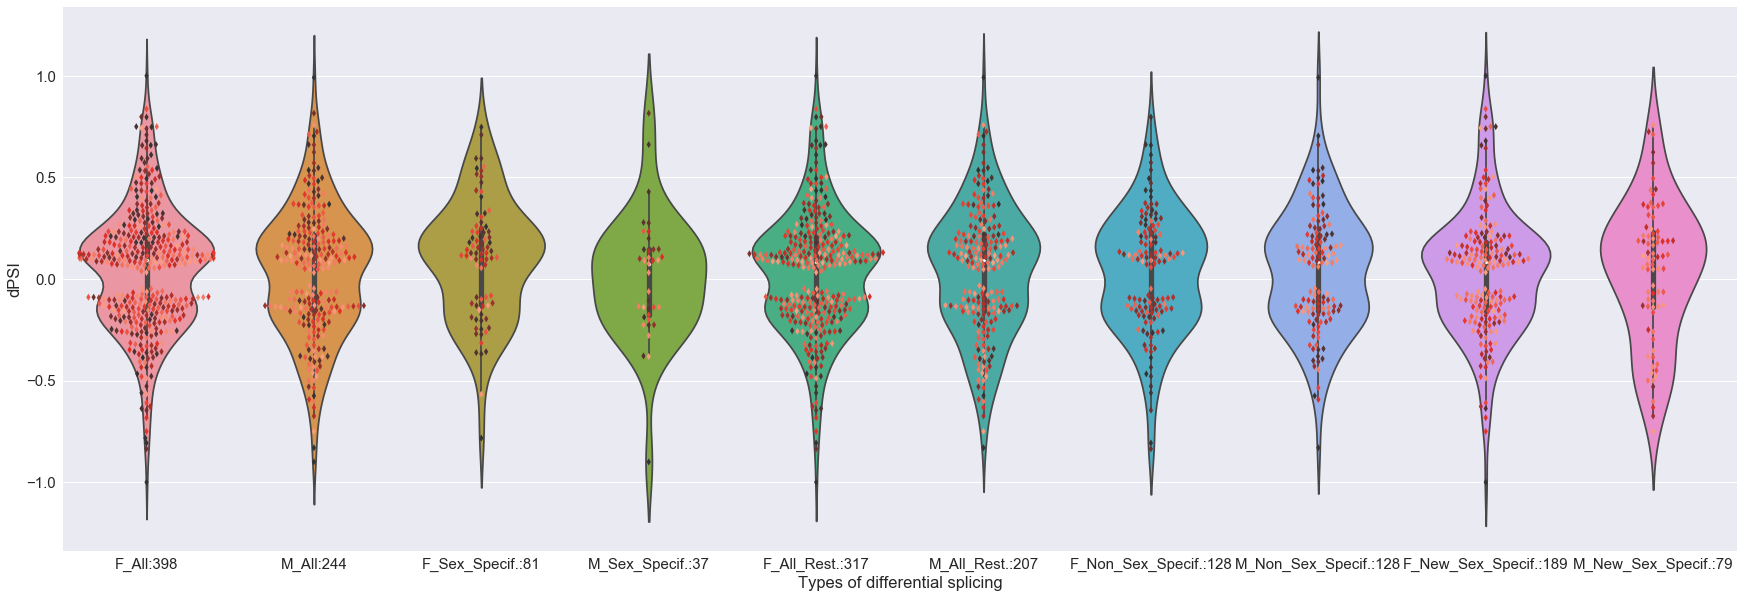

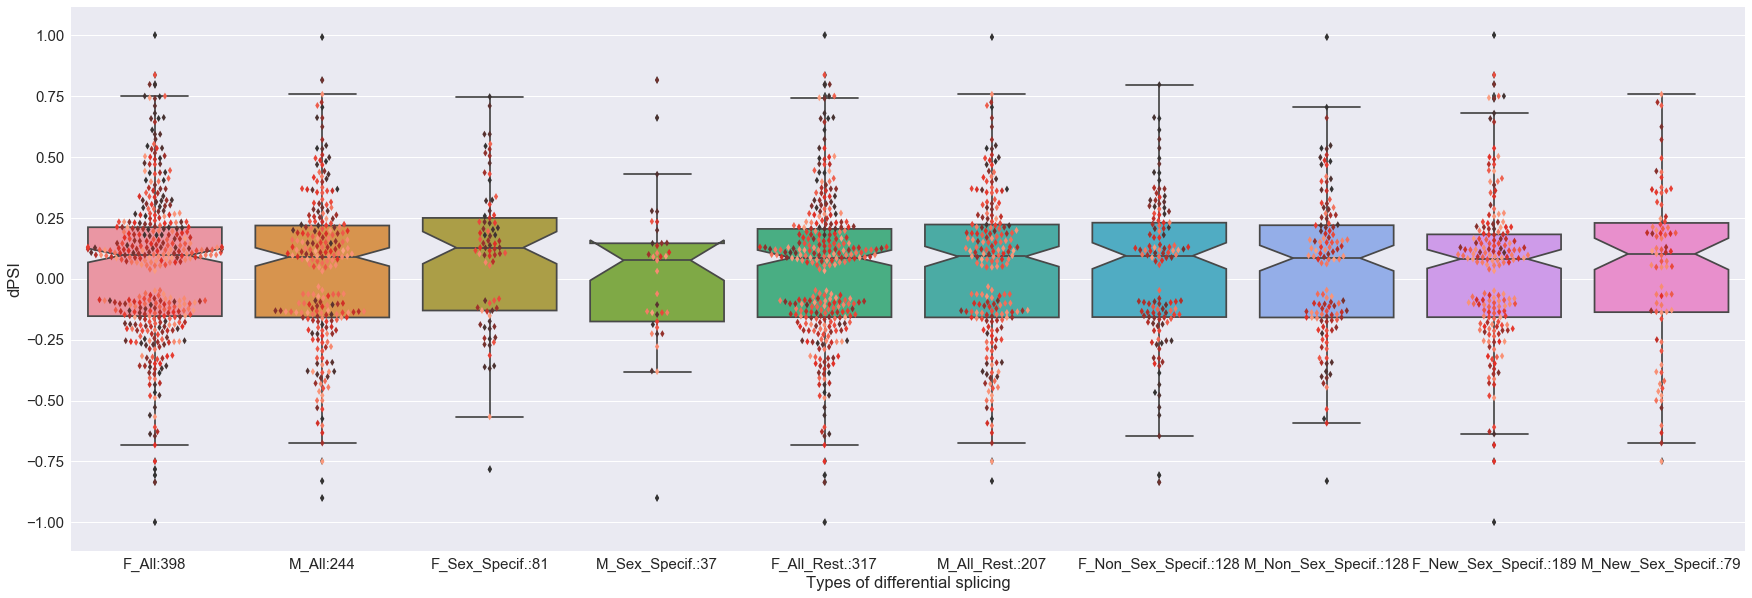

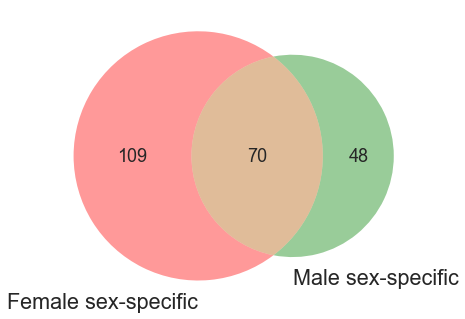

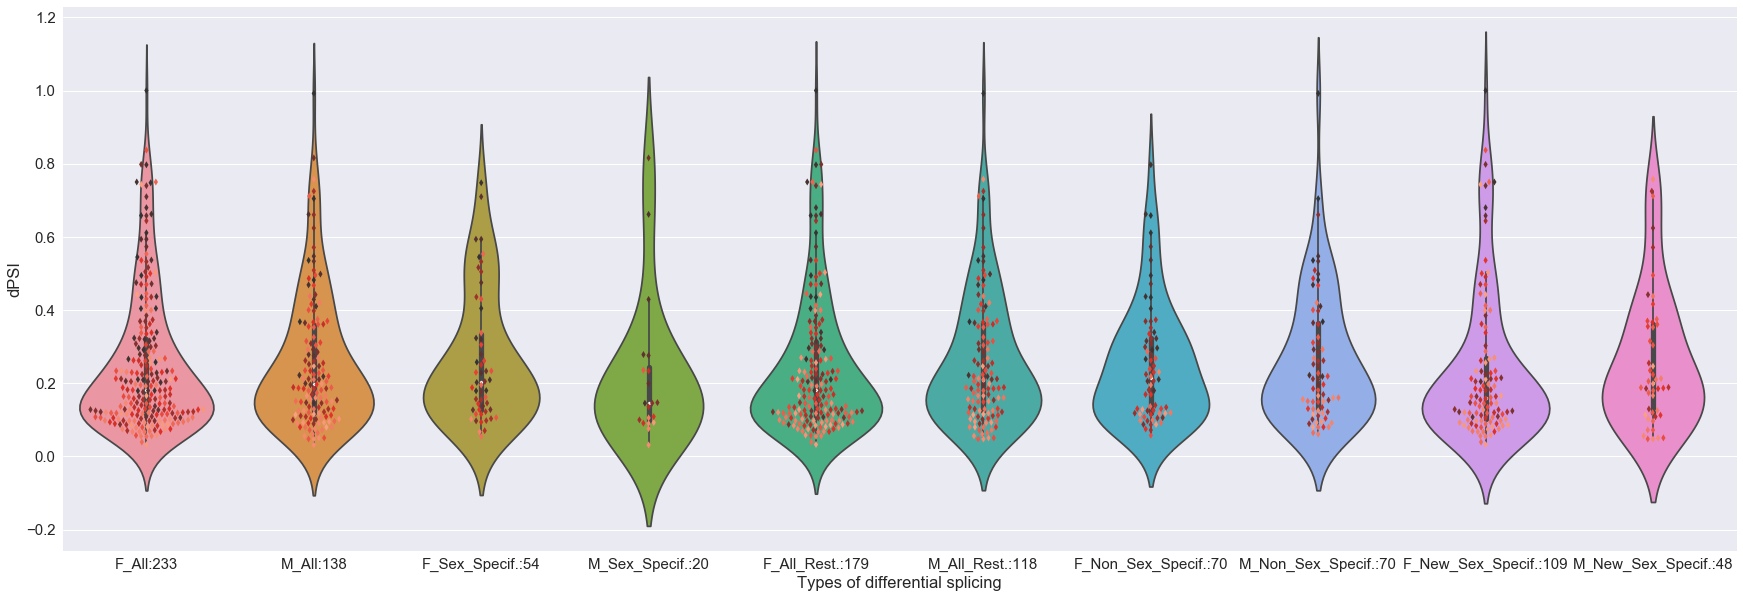

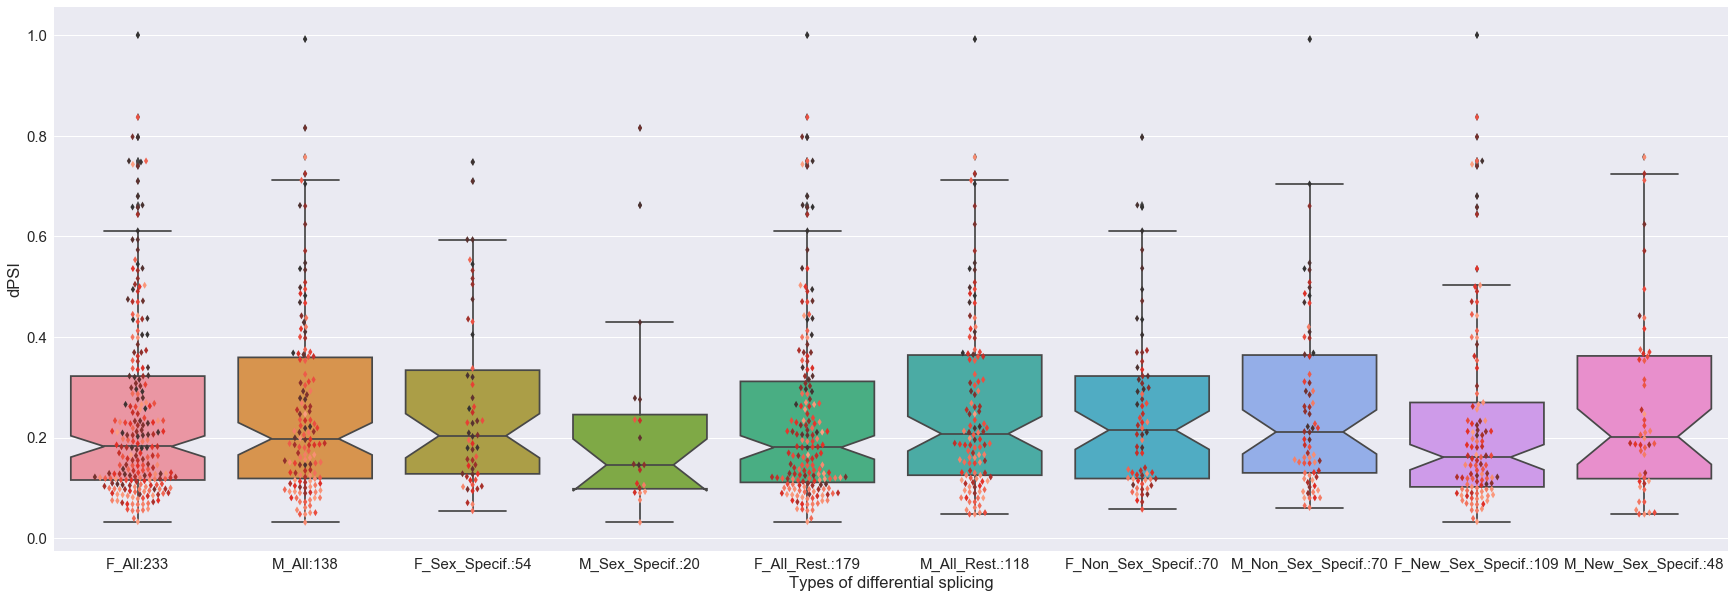

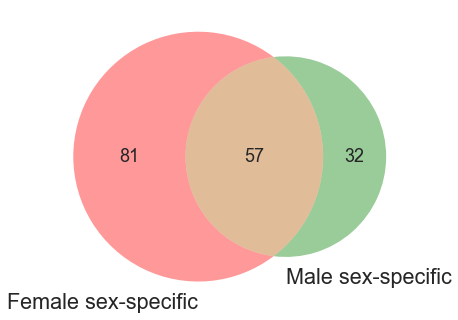

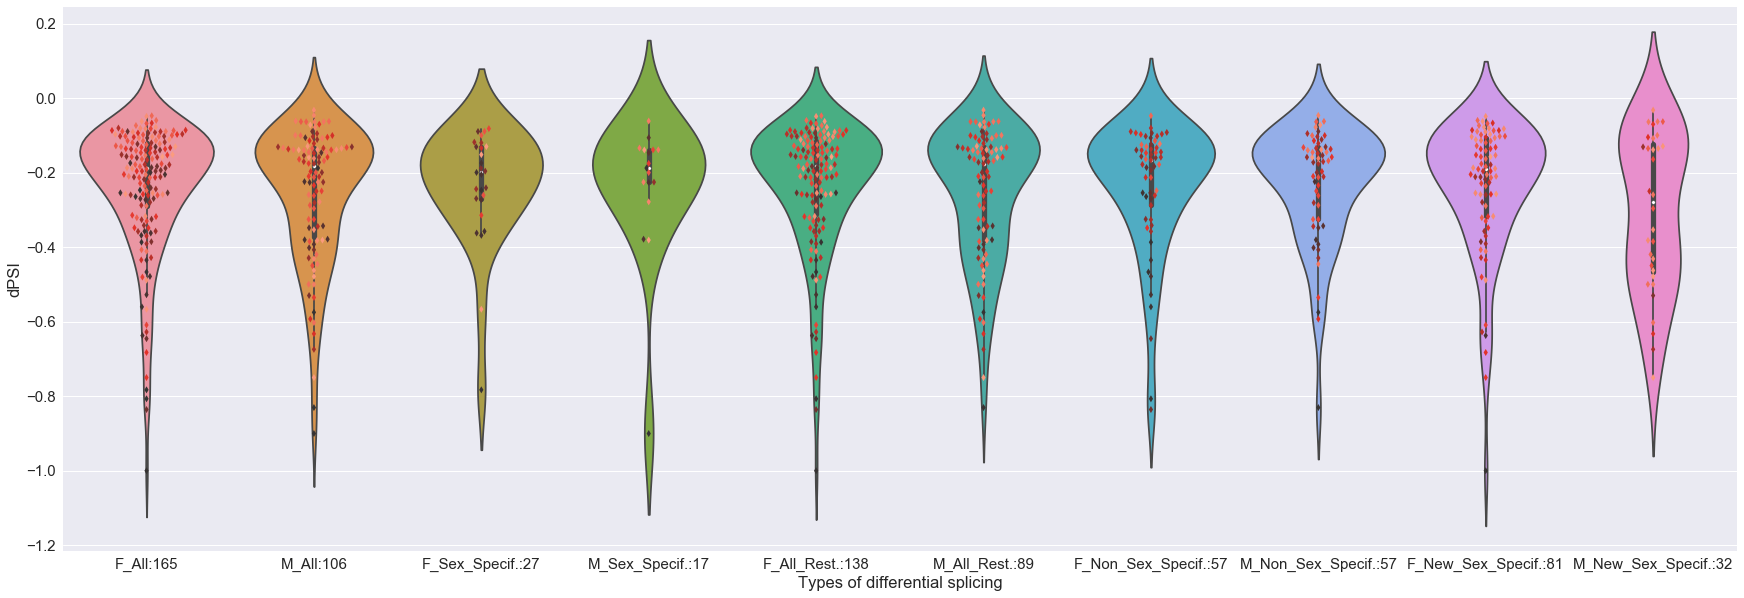

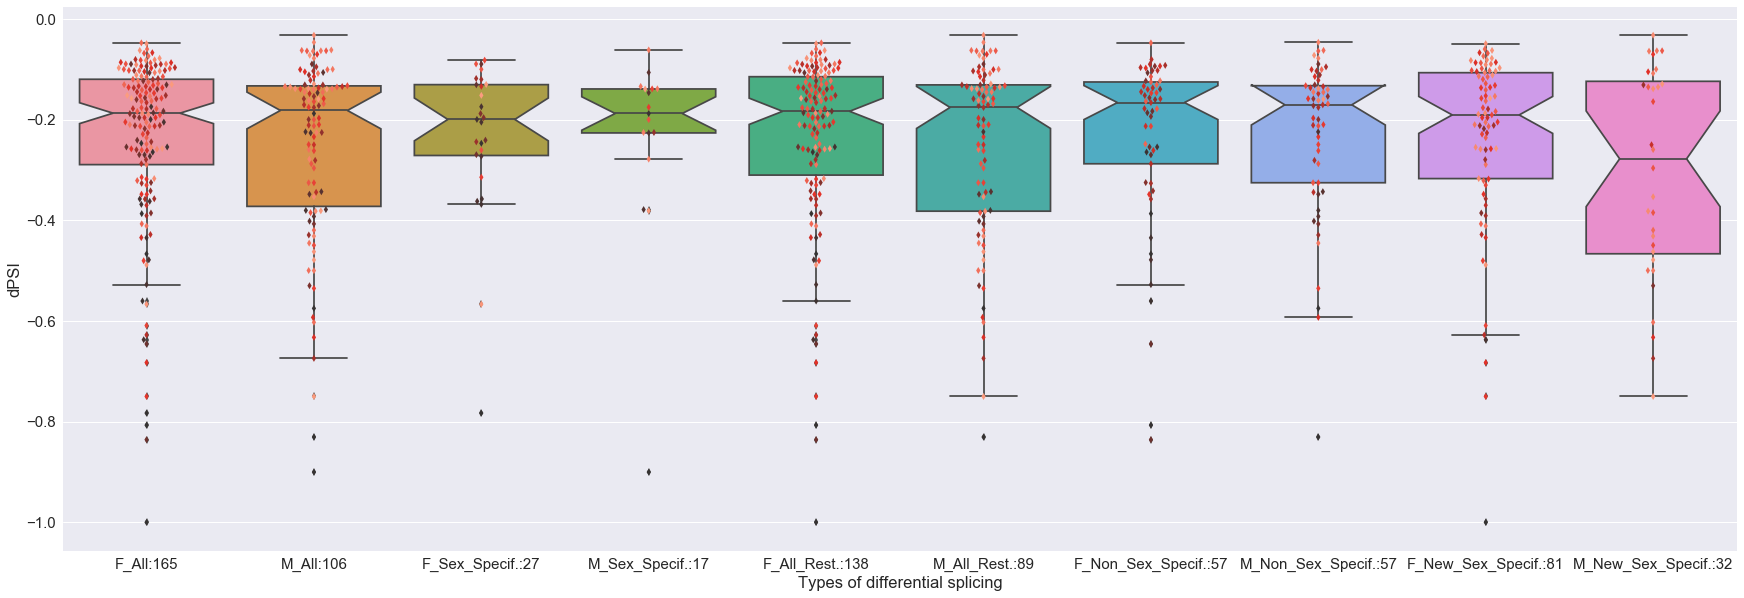

In [87]:
TIME="2_4"

for i in pos_neg:
    if i=="b":
        print("Running on both positive and negative dPSI.")
    elif i=="p": # positive set
        df_2_4f=df_2_4fp
        df_2_4m=df_2_4mp
    else: # negative set
        df_2_4f=df_2_4fn
        df_2_4m=df_2_4mn
        
    # All genes that are sex specific from controls
    df_2_4_cf_cm_filt = df_2_4_cf_cm[df_2_4_cf_cm[pval]<=0.05]
    controls_list_ss_filt = df_2_4_cf_cm_filt.index.values.tolist() 

    # keep only the rows in the controls_input_2_4_cf_cm to get sex specific
    df_2_4_f_ss = df_2_4f[df_2_4f.index.isin(controls_list_ss_filt)]
    df_2_4_m_ss = df_2_4m[df_2_4m.index.isin(controls_list_ss_filt)]

    # All other genes that are significant but not sex specific genes
    df_2_4_f_ar = df_2_4f[~df_2_4f.index.isin(controls_list_ss_filt)]
    df_2_4_m_ar = df_2_4m[~df_2_4m.index.isin(controls_list_ss_filt)]

    # New sex specific thus are significant but not in sex specifc list (thus diff. btw males and females in comparisons)
    df_2_4f_newss1 = df_2_4f[~df_2_4f.index.isin(controls_list_ss_filt)]
    df_2_4m_newss1 = df_2_4m[~df_2_4m.index.isin(controls_list_ss_filt)]

    df_2_4f_newss1_list = df_2_4f_newss1.index.values.tolist() 
    df_2_4m_newss1_list = df_2_4m_newss1.index.values[:-5000].tolist() 

    # venn of overlapping ss in f and m

    # 0-2 F vs. M all
    df_2_4f_filt = df_2_4f[df_2_4f[pval]<=0.05]
    df_2_4f_filt['sex'] = 'F_All:%s'%len(df_2_4f_filt)
    df_2_4m_filt = df_2_4m[df_2_4m[pval]<=0.05]
    df_2_4m_filt['sex'] = 'M_All:%s'%len(df_2_4m_filt)

    df1 = df_2_4f_filt.append(df_2_4m_filt)

    # 0-2 Sex specific thus control F vs. M for list then filter those genes
    df_2_4f_filt_ss = df_2_4_f_ss[df_2_4_f_ss[pval]<=0.05]
    df_2_4f_filt_ss['sex'] = 'F_Sex_Specif.:%s'%len(df_2_4f_filt_ss)
    df_2_4m_filt_ss = df_2_4_m_ss[df_2_4_m_ss[pval]<=0.05]
    df_2_4m_filt_ss['sex'] = 'M_Sex_Specif.:%s'%len(df_2_4m_filt_ss)

    df2 = df1.append(df_2_4f_filt_ss)
    df3 = df2.append(df_2_4m_filt_ss)

    # 0-2 All rest 
    df_2_4f_filt_ar = df_2_4_f_ar[df_2_4_f_ar[pval]<=0.05]
    df_2_4f_filt_ar['sex'] = 'F_All_Rest.:%s'%len(df_2_4f_filt_ar)
    df_2_4m_filt_ar = df_2_4_m_ar[df_2_4_m_ar[pval]<=0.05]
    df_2_4m_filt_ar['sex'] = 'M_All_Rest.:%s'%len(df_2_4m_filt_ar)

    df_2_4f_filt_ar_list = df_2_4f_filt_ar.index.values.tolist() 
    df_2_4m_filt_ar_list = df_2_4m_filt_ar.index.values.tolist() 

    df4 = df3.append(df_2_4f_filt_ar)
    df5 = df4.append(df_2_4m_filt_ar) 

    # Venn diagram between them
    venn2([set(df_2_4f_filt_ar_list), set(df_2_4m_filt_ar_list)],
          set_labels = ('Female sex-specific', 'Male sex-specific'))
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_venn_PSI.pdf")
    plt.show()

    # 0-2 NOT sex specific thus ~control F vs. M list then filter those genes
    df_2_4filt_nss_list = intersection(df_2_4f_filt_ar_list, df_2_4m_filt_ar_list)
    df_2_4f_filt_nss = df_2_4f_filt_ar[df_2_4f_filt_ar.index.isin(df_2_4filt_nss_list)]
    df_2_4f_filt_nss['sex'] = 'F_Non_Sex_Specif.:%s'%len(df_2_4f_filt_nss)
    df_2_4m_filt_nss = df_2_4m_filt_ar[df_2_4m_filt_ar.index.isin(df_2_4filt_nss_list)]
    df_2_4m_filt_nss['sex'] = 'M_Non_Sex_Specif.:%s'%len(df_2_4m_filt_nss)

    df6 = df5.append(df_2_4f_filt_nss)
    df7 = df6.append(df_2_4m_filt_nss)

    # 0-2 New sex specific thus ~control F vs. M list then filter those gene
    df_2_4f_filt_newss_list = list(set(df_2_4f_filt_ar_list) - set(df_2_4m_filt_ar_list))
    df_2_4f_filt_newss = df_2_4f_filt_ar[df_2_4f_filt_ar.index.isin(df_2_4f_filt_newss_list)]
    df_2_4f_filt_newss['sex'] = 'F_New_Sex_Specif.:%s'%len(df_2_4f_filt_newss)

    df_2_4m_filt_newss_list = list(set(df_2_4m_filt_ar_list) - set(df_2_4f_filt_ar_list))
    df_2_4m_filt_newss = df_2_4m_filt_ar[df_2_4m_filt_ar.index.isin(df_2_4m_filt_newss_list)]
    df_2_4m_filt_newss['sex'] = 'M_New_Sex_Specif.:%s'%len(df_2_4m_filt_newss)

    df8 = df7.append(df_2_4f_filt_newss)
    df9_2_4_psi = df8.append(df_2_4m_filt_newss)


    #### Plots 
    sns.set(style="whitegrid")
    # Make boxplot for one group only
    sns.set(font_scale = 1.5)
    f = plt.figure(figsize=(30,10))
    ax = f.add_subplot(111)
    #pal = sns.palplot(sns.light_palette("navy", reverse=True))

    sns.set_palette("Paired")
    sns.violinplot( x="sex", y=PSI, data=df9_2_4_psi)

    # sequential_colors = sns.color_palette("RdPu", 100)
    # sns.palplot(sequential_colors)

    sns.swarmplot( x="sex", y=PSI, color='red', marker="d", hue=pval, data=df9_2_4_psi, palette="Reds_d")
    ax.get_legend().set_visible(False)
    ax.set(xlabel='Types of differential splicing', ylabel='dPSI')
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_violin_PSI.pdf")
    sns.plt.show()

    sns.set(style="whitegrid")
    # Make boxplot for one group only
    sns.set(font_scale = 1.5)
    f = plt.figure(figsize=(30,10))
    ax = f.add_subplot(111)
    #pal = sns.palplot(sns.light_palette("navy", reverse=True))

    sns.set_palette("Paired")
    sns.boxplot( x="sex", y=PSI, data=df9_2_4_psi, notch="TRUE")

    sns.swarmplot( x="sex", y=PSI, color='red', marker="d", hue=pval, data=df9_2_4_psi, palette="Reds_d")
    ax.get_legend().set_visible(False)
    ax.set(xlabel='Types of differential splicing', ylabel='dPSI')
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_boxplot_PSI.pdf")
    sns.plt.show()

    #### K-S Tests
    with open(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_ksTest_PSI.txt", 'w') as f:
        # All
        psi_f_all = np.asarray(df_2_4f_filt[PSI])
        psi_m_all = np.asarray(df_2_4m_filt[PSI])
        print >> f, "All K-S Test: ", stats.ks_2samp(psi_f_all, psi_m_all)

        # Sex specific
        psi_f_ss = np.asarray(df_2_4f_filt_ss[PSI])
        psi_m_ss = np.asarray(df_2_4m_filt_ss[PSI])
        print >> f, "Sex specific K-S Test: ", stats.ks_2samp(psi_f_ss, psi_m_ss)

        # All rest
        psi_f_ar = np.asarray(df_2_4f_filt_ar[PSI])
        psi_m_ar = np.asarray(df_2_4m_filt_ar[PSI])
        print >> f, "All rest K-S Test: ", stats.ks_2samp(psi_f_ar, psi_m_ar)

        # Non-sex specif.
        psi_f_nss = np.asarray(df_2_4f_filt_nss[PSI])
        psi_m_nss = np.asarray(df_2_4m_filt_nss[PSI])
        print >> f, "Non-sex specific K-S Test: ", stats.ks_2samp(psi_f_nss, psi_m_nss)

        # New sex specif.
        psi_f_newss = np.asarray(df_2_4f_filt_newss[PSI])
        psi_m_newss = np.asarray(df_2_4m_filt_newss[PSI])
        print >> f, "New sex specific K-S Test: ", stats.ks_2samp(psi_f_newss, psi_m_newss)

# DTU data prep

In [79]:
pvaldtu = "clampRNAi_iso_tpm-control_iso_tpm_p-val"
DTU = "clampRNAi_iso_tpm-control_iso_tpm_dPSI" 

female_input_0_2_f = OUTDIR_BOX+"/merged_0-2_f/clampRNAi_diffSplice_iso_dtu.dpsi"
male_input_0_2_m = OUTDIR_BOX+"merged_0-2_m/clampRNAi_diffSplice_iso_dtu.dpsi"

controls_input_0_2_cf_cm = OUTDIR_BOX+"/merged_0-2_cf_cm/clampRNAi_diffSplice_iso_dtu.dpsi"

female_input_2_4_f = OUTDIR_BOX+"/merged_2-4_f/clampRNAi_diffSplice_iso_dtu.dpsi"
male_input_2_4_m = OUTDIR_BOX+"/merged_2-4_m/clampRNAi_diffSplice_iso_dtu.dpsi"

controls_input_2_4_cf_cm = OUTDIR_BOX+"/merged_2-4_cf_cm/clampRNAi_diffSplice_iso_dtu.dpsi"

df_0_2f = pd.read_csv(female_input_0_2_f, sep="\t")
df_0_2fp = df_0_2f[df_0_2f[DTU] > 0.0]
df_0_2fn = df_0_2f[df_0_2f[DTU] < 0.0]
df_0_2fz = df_0_2f[df_0_2f[DTU] == 0.0]

df_0_2m = pd.read_csv(male_input_0_2_m, sep="\t")
df_0_2mp = df_0_2m[df_0_2m[DTU] > 0.0]
df_0_2mn = df_0_2m[df_0_2m[DTU] < 0.0]
df_0_2mz = df_0_2m[df_0_2m[DTU] == 0.0]

df_0_2_cf_cm = pd.read_csv(controls_input_0_2_cf_cm, sep="\t")

df_2_4f = pd.read_csv(female_input_2_4_f, sep="\t")
df_2_4fp = df_2_4f[df_2_4f[DTU] > 0.0]
df_2_4fn = df_2_4f[df_2_4f[DTU] < 0.0]
df_2_4fz = df_2_4f[df_2_4f[DTU] == 0.0]

df_2_4m = pd.read_csv(male_input_2_4_m, sep="\t")
df_2_4mp = df_2_4m[df_2_4m[DTU] > 0.0]
df_2_4mn = df_2_4m[df_2_4m[DTU] < 0.0]
df_2_4mz = df_2_4m[df_2_4m[DTU] == 0.0]

df_2_4_cf_cm = pd.read_csv(controls_input_2_4_cf_cm, sep="\t")

# 0-2 DTU

/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

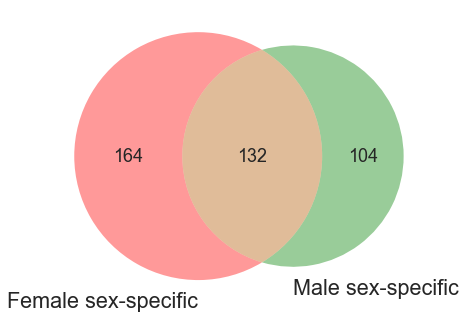

/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

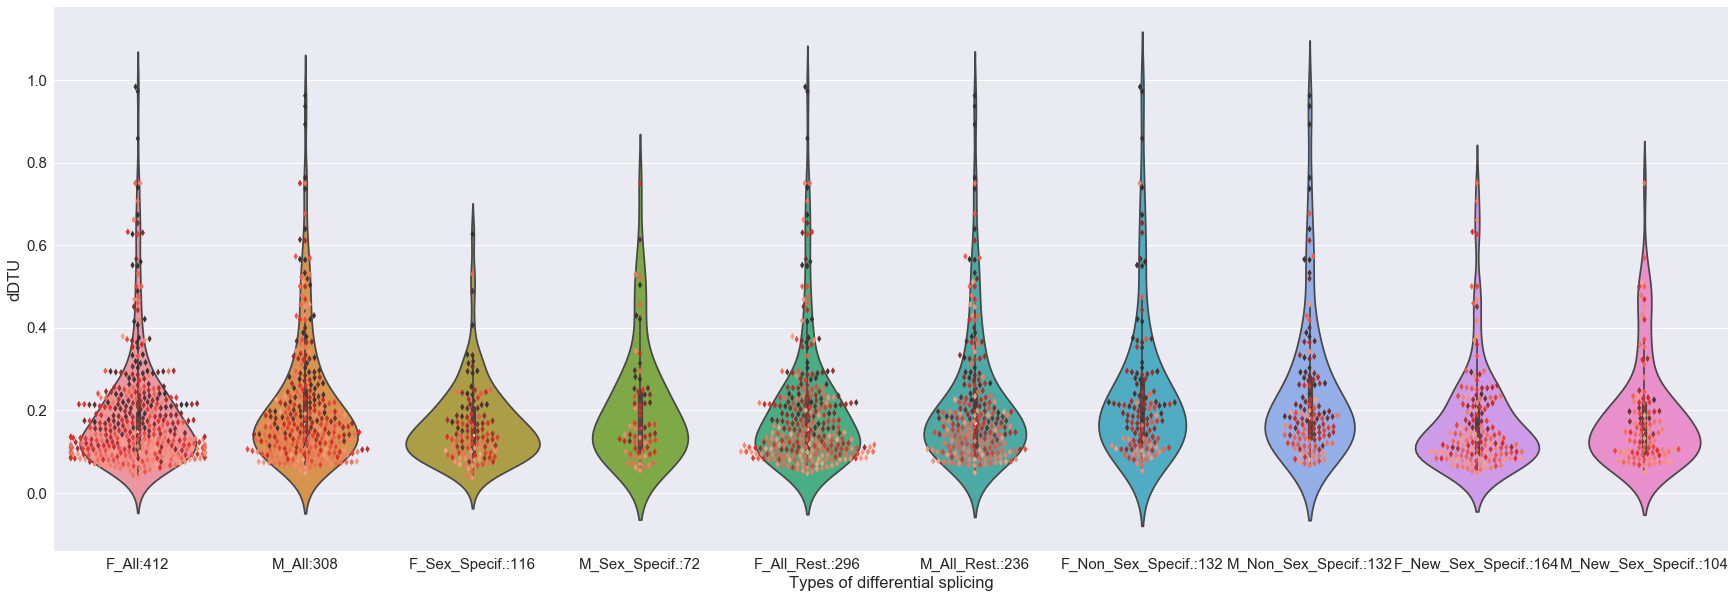

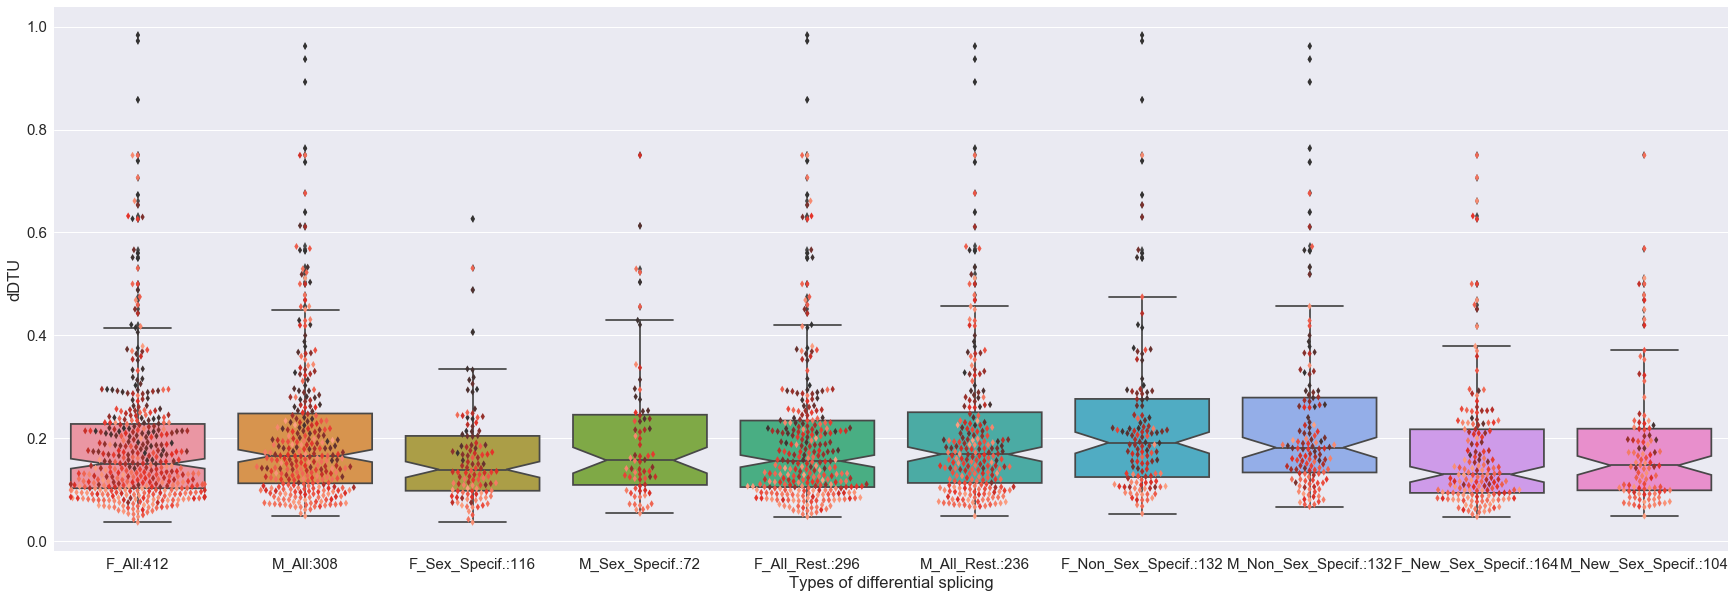

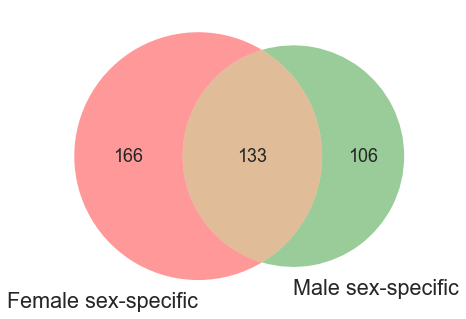

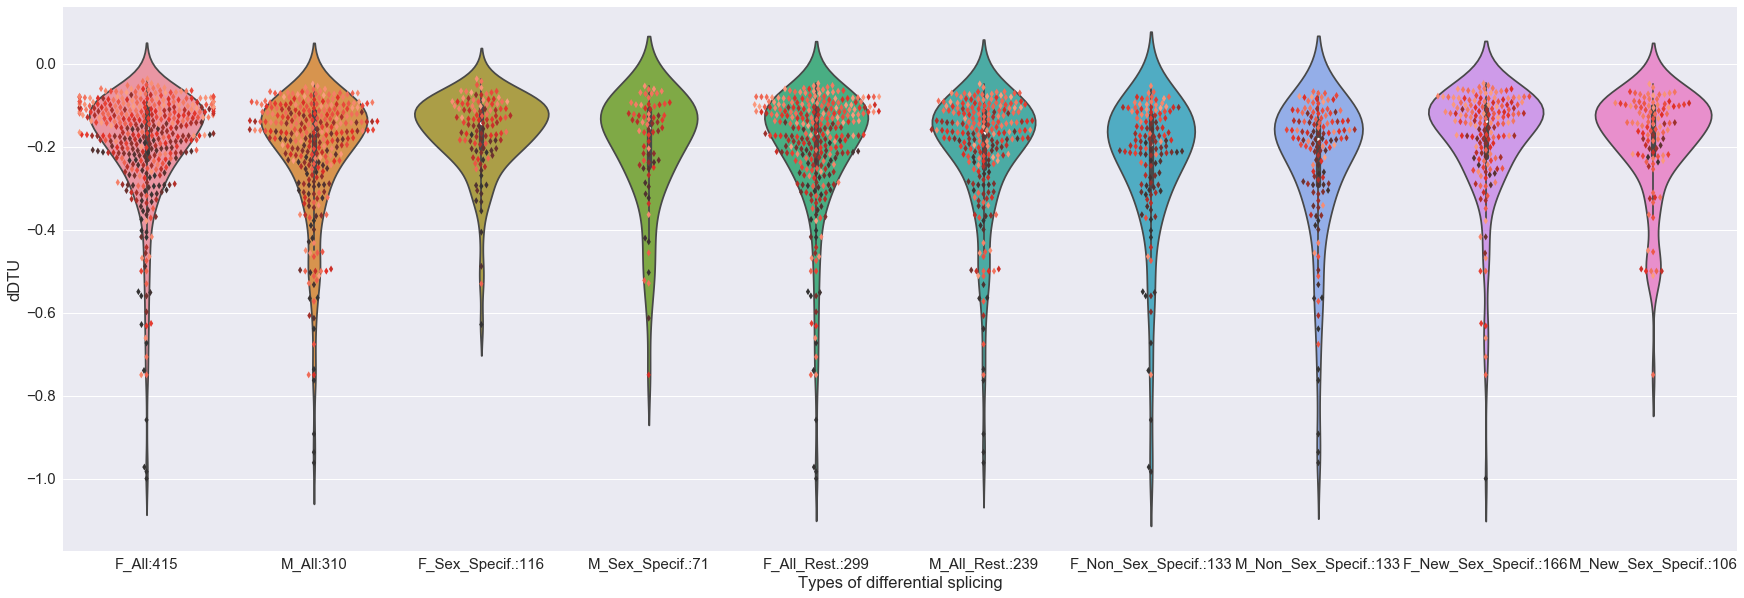

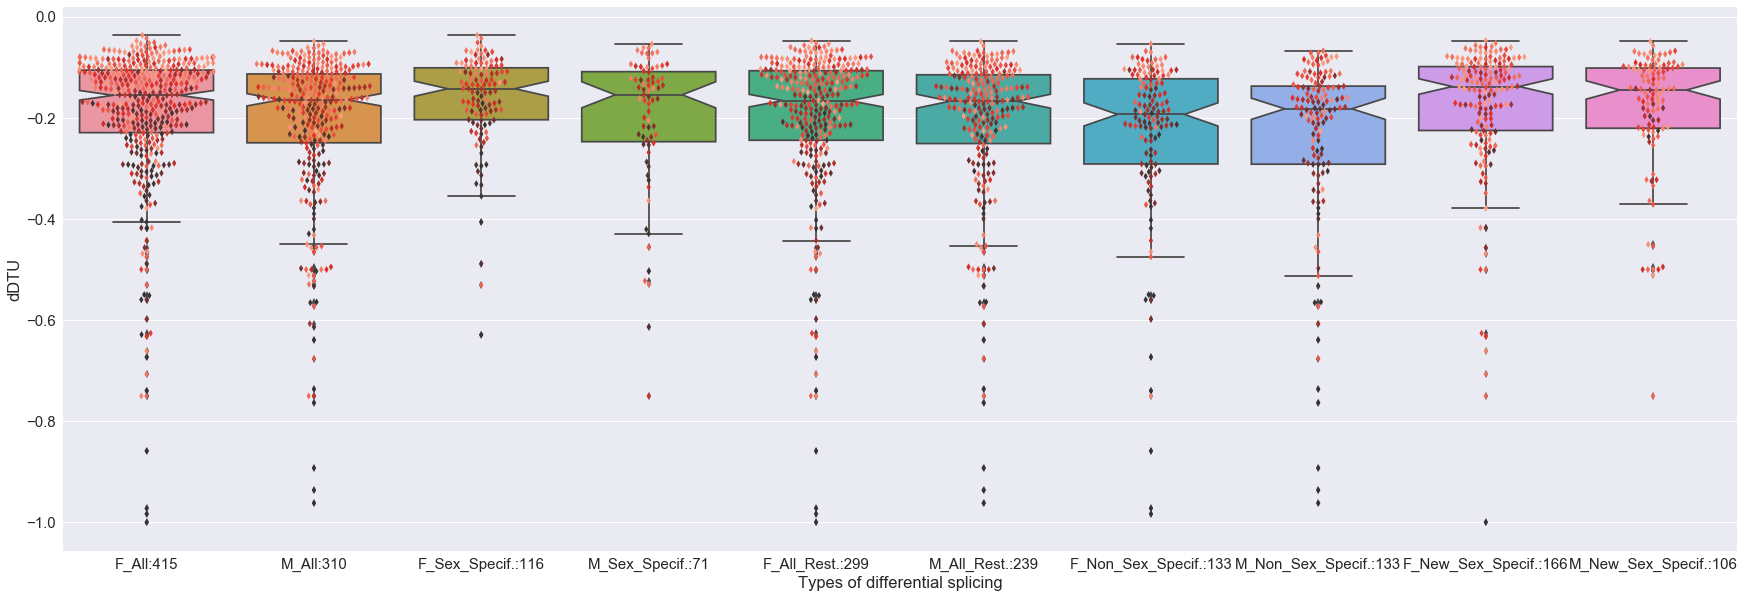

In [72]:
TIME="0_2"

for i in pos_neg:
    if i=="b":
        print("Running on both positive and negative dDTU.")  
    elif i=="p": # positive set
        df_0_2f=df_0_2fp
        df_0_2m=df_0_2mp
    else: # negative set
        df_0_2f=df_0_2fn
        df_0_2m=df_0_2mn
        
    # All genes that are sex specific from controls
    df_0_2_cf_cm_filt = df_0_2_cf_cm[df_0_2_cf_cm[pvaldtu]<=0.05]
    controls_list_ss_filt = df_0_2_cf_cm_filt.index.values.tolist() 

    # keep only the rows in the controls_input_0_2_cf_cm to get sex specific
    df_0_2_f_ss = df_0_2f[df_0_2f.index.isin(controls_list_ss_filt)]
    df_0_2_m_ss = df_0_2m[df_0_2m.index.isin(controls_list_ss_filt)]

    # All other genes that are significant but not sex specific genes
    df_0_2_f_ar = df_0_2f[~df_0_2f.index.isin(controls_list_ss_filt)]
    df_0_2_m_ar = df_0_2m[~df_0_2m.index.isin(controls_list_ss_filt)]

    # New sex specific thus are significant but not in sex specifc list (thus diff. btw males and females in comparisons)
    df_0_2f_newss1 = df_0_2f[~df_0_2f.index.isin(controls_list_ss_filt)]
    df_0_2m_newss1 = df_0_2m[~df_0_2m.index.isin(controls_list_ss_filt)]

    df_0_2f_newss1_list = df_0_2f_newss1.index.values.tolist() 
    df_0_2m_newss1_list = df_0_2m_newss1.index.values[:-5000].tolist() 

    # venn of overlapping ss in f and m

    # 0-2 F vs. M all
    df_0_2f_filt = df_0_2f[df_0_2f[pvaldtu]<=0.05]
    df_0_2f_filt['sex'] = 'F_All:%s'%len(df_0_2f_filt)
    df_0_2m_filt = df_0_2m[df_0_2m[pvaldtu]<=0.05]
    df_0_2m_filt['sex'] = 'M_All:%s'%len(df_0_2m_filt)

    df1 = df_0_2f_filt.append(df_0_2m_filt)

    # 0-2 Sex specific thus control F vs. M for list then filter those genes
    df_0_2f_filt_ss = df_0_2_f_ss[df_0_2_f_ss[pvaldtu]<=0.05]
    df_0_2f_filt_ss['sex'] = 'F_Sex_Specif.:%s'%len(df_0_2f_filt_ss)
    df_0_2m_filt_ss = df_0_2_m_ss[df_0_2_m_ss[pvaldtu]<=0.05]
    df_0_2m_filt_ss['sex'] = 'M_Sex_Specif.:%s'%len(df_0_2m_filt_ss)

    df2 = df1.append(df_0_2f_filt_ss)
    df3 = df2.append(df_0_2m_filt_ss)

    # 0-2 All rest 
    df_0_2f_filt_ar = df_0_2_f_ar[df_0_2_f_ar[pvaldtu]<=0.05]
    df_0_2f_filt_ar['sex'] = 'F_All_Rest.:%s'%len(df_0_2f_filt_ar)
    df_0_2m_filt_ar = df_0_2_m_ar[df_0_2_m_ar[pvaldtu]<=0.05]
    df_0_2m_filt_ar['sex'] = 'M_All_Rest.:%s'%len(df_0_2m_filt_ar)

    df_0_2f_filt_ar_list = df_0_2f_filt_ar.index.values.tolist() 
    df_0_2m_filt_ar_list = df_0_2m_filt_ar.index.values.tolist() 

    df4 = df3.append(df_0_2f_filt_ar)
    df5 = df4.append(df_0_2m_filt_ar) 

    # Venn diagram between them
    venn2([set(df_0_2f_filt_ar_list), set(df_0_2m_filt_ar_list)],
          set_labels = ('Female sex-specific', 'Male sex-specific'))
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_venn_DTU.pdf")
    plt.show()

    # 0-2 NOT sex specific thus ~control F vs. M list then filter those genes
    df_0_2filt_nss_list = intersection(df_0_2f_filt_ar_list, df_0_2m_filt_ar_list)
    df_0_2f_filt_nss = df_0_2f_filt_ar[df_0_2f_filt_ar.index.isin(df_0_2filt_nss_list)]
    df_0_2f_filt_nss['sex'] = 'F_Non_Sex_Specif.:%s'%len(df_0_2f_filt_nss)
    df_0_2m_filt_nss = df_0_2m_filt_ar[df_0_2m_filt_ar.index.isin(df_0_2filt_nss_list)]
    df_0_2m_filt_nss['sex'] = 'M_Non_Sex_Specif.:%s'%len(df_0_2m_filt_nss)

    df6 = df5.append(df_0_2f_filt_nss)
    df7 = df6.append(df_0_2m_filt_nss)

    # 0-2 New sex specific thus ~control F vs. M list then filter those gene
    df_0_2f_filt_newss_list = list(set(df_0_2f_filt_ar_list) - set(df_0_2m_filt_ar_list))
    df_0_2f_filt_newss = df_0_2f_filt_ar[df_0_2f_filt_ar.index.isin(df_0_2f_filt_newss_list)]
    df_0_2f_filt_newss['sex'] = 'F_New_Sex_Specif.:%s'%len(df_0_2f_filt_newss)

    df_0_2m_filt_newss_list = list(set(df_0_2m_filt_ar_list) - set(df_0_2f_filt_ar_list))
    df_0_2m_filt_newss = df_0_2m_filt_ar[df_0_2m_filt_ar.index.isin(df_0_2m_filt_newss_list)]
    df_0_2m_filt_newss['sex'] = 'M_New_Sex_Specif.:%s'%len(df_0_2m_filt_newss)

    df8 = df7.append(df_0_2f_filt_newss)
    df9_0_2_dtu = df8.append(df_0_2m_filt_newss)

    #### Plots 
    sns.set(style="whitegrid")
    # Make boxplot for one group only
    sns.set(font_scale = 1.5)
    f = plt.figure(figsize=(30,10))
    ax = f.add_subplot(111)
    #pal = sns.palplot(sns.light_palette("navy", reverse=True))

    sns.set_palette("Paired")
    sns.violinplot( x="sex", y=DTU, data=df9_0_2_dtu)

    # sequential_colors = sns.color_palette("RdPu", 100)
    # sns.palplot(sequential_colors)

    sns.swarmplot( x="sex", y=DTU, color='red', marker="d", hue=pvaldtu, data=df9_0_2_dtu, palette="Reds_d")
    ax.get_legend().set_visible(False)
    ax.set(xlabel='Types of differential splicing', ylabel='dDTU')
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_violin_DTU.pdf")
    sns.plt.show()

    sns.set(style="whitegrid")
    # Make boxplot for one group only
    sns.set(font_scale = 1.5)
    f = plt.figure(figsize=(30,10))
    ax = f.add_subplot(111)
    #pal = sns.palplot(sns.light_palette("navy", reverse=True))

    sns.set_palette("Paired")
    sns.boxplot( x="sex", y=DTU, data=df9_0_2_dtu, notch="TRUE")

    sns.swarmplot( x="sex", y=DTU, color='red', marker="d", hue=pvaldtu, data=df9_0_2_dtu, palette="Reds_d")
    ax.get_legend().set_visible(False)
    ax.set(xlabel='Types of differential splicing', ylabel='dDTU')
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_boxplot_DTU.pdf")
    sns.plt.show()

    #### K-S Tests
    with open(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_ksTest_DTU.txt", 'w') as f:
        # All
        DTU_f_all = np.asarray(df_0_2f_filt[DTU])
        DTU_m_all = np.asarray(df_0_2m_filt[DTU])
        print >> f, "All K-S Test: ", stats.ks_2samp(DTU_f_all, DTU_m_all)

        # Sex specific
        DTU_f_ss = np.asarray(df_0_2f_filt_ss[DTU])
        DTU_m_ss = np.asarray(df_0_2m_filt_ss[DTU])
        print >> f, "Sex specific K-S Test: ", stats.ks_2samp(DTU_f_ss, DTU_m_ss)

        # All rest
        DTU_f_ar = np.asarray(df_0_2f_filt_ar[DTU])
        DTU_m_ar = np.asarray(df_0_2m_filt_ar[DTU])
        print >> f, "All rest K-S Test: ", stats.ks_2samp(DTU_f_ar, DTU_m_ar)

        # Non-sex specif.
        DTU_f_nss = np.asarray(df_0_2f_filt_nss[DTU])
        DTU_m_nss = np.asarray(df_0_2m_filt_nss[DTU])
        print >> f, "Non-sex specific K-S Test: ", stats.ks_2samp(DTU_f_nss, DTU_m_nss)

        # New sex specif.
        DTU_f_newss = np.asarray(df_0_2f_filt_newss[DTU])
        DTU_m_newss = np.asarray(df_0_2m_filt_newss[DTU])
        print >> f, "New sex specific K-S Test: ", stats.ks_2samp(DTU_f_newss, DTU_m_newss)

# 2-4 DTU

/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

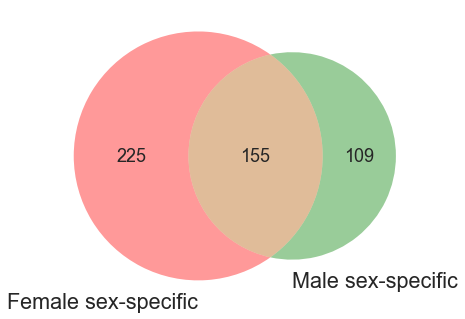

/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ashleymaeconard/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

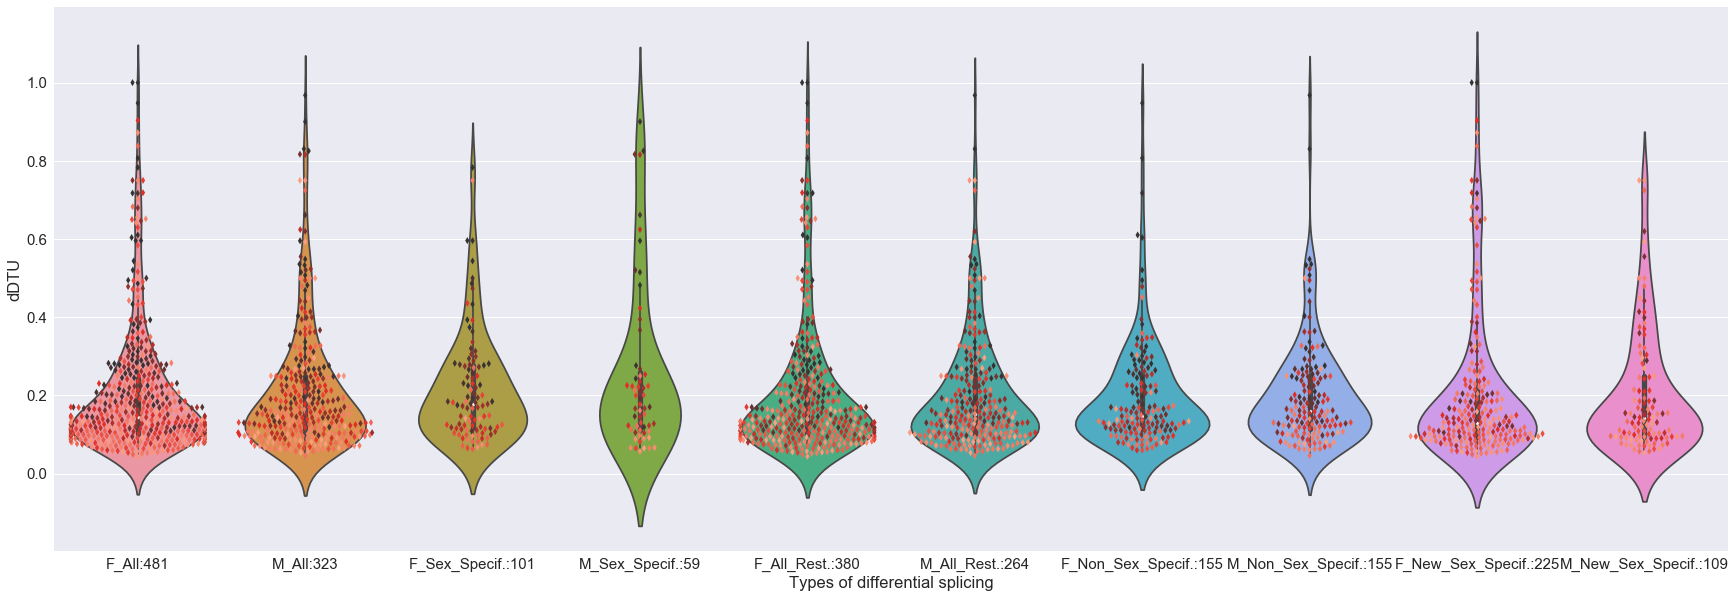

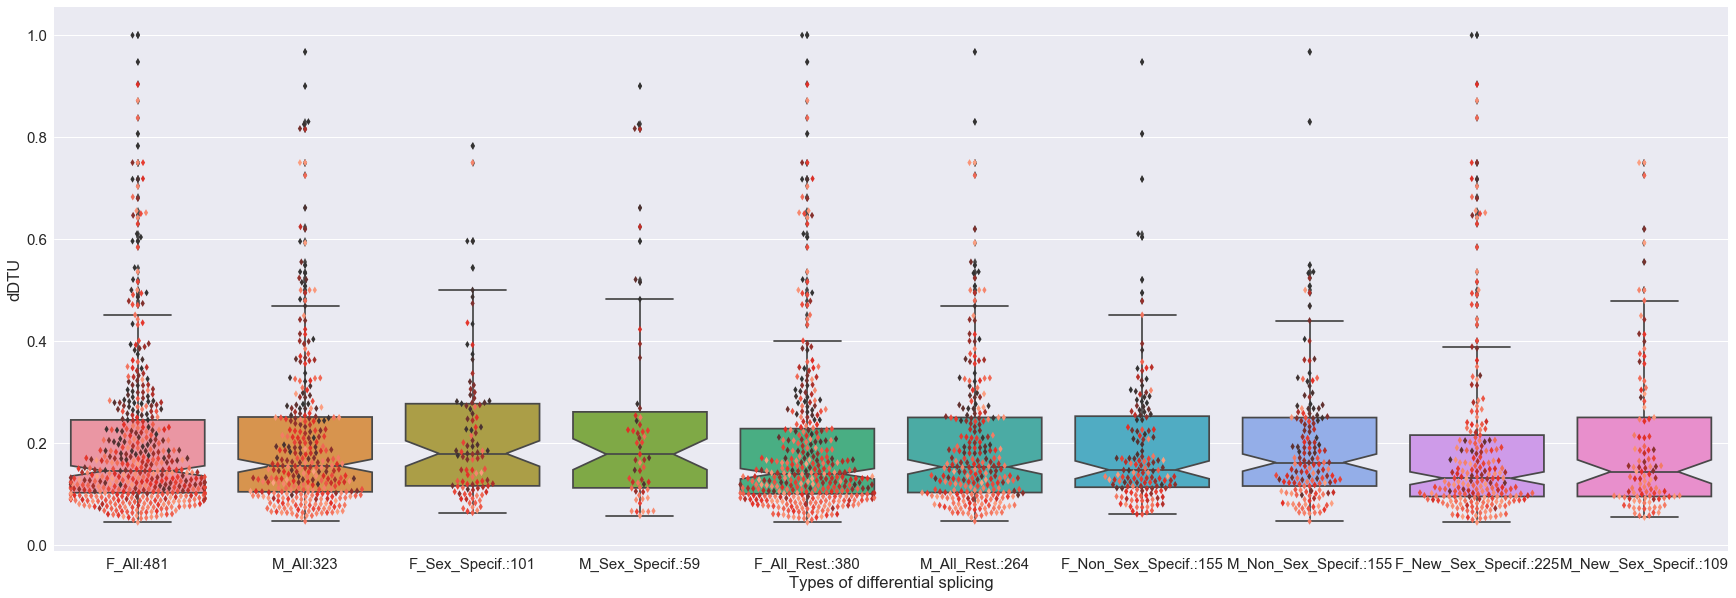

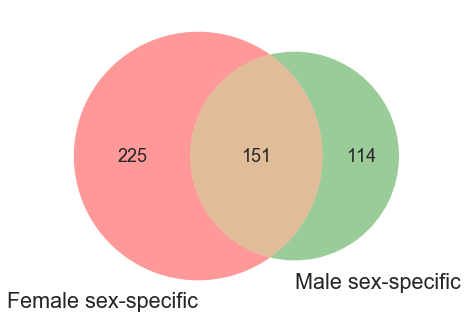

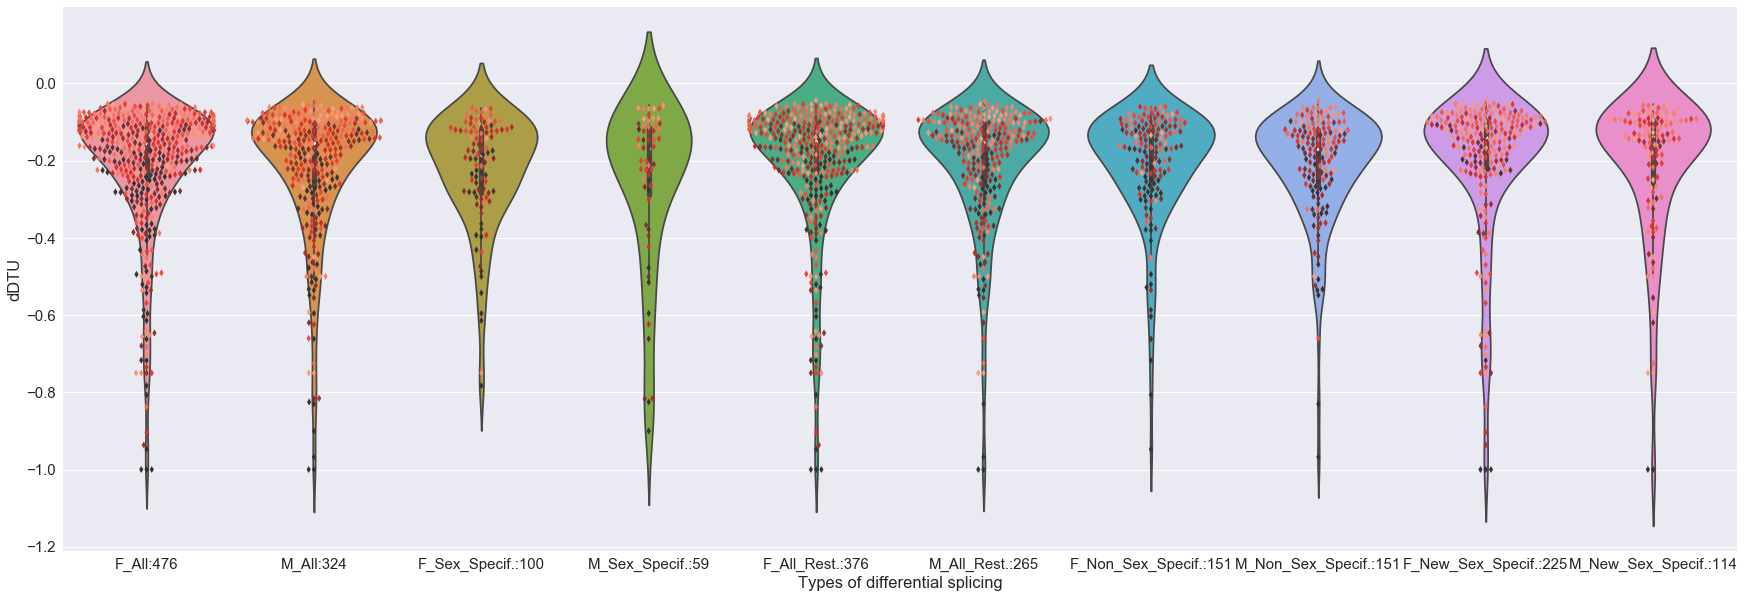

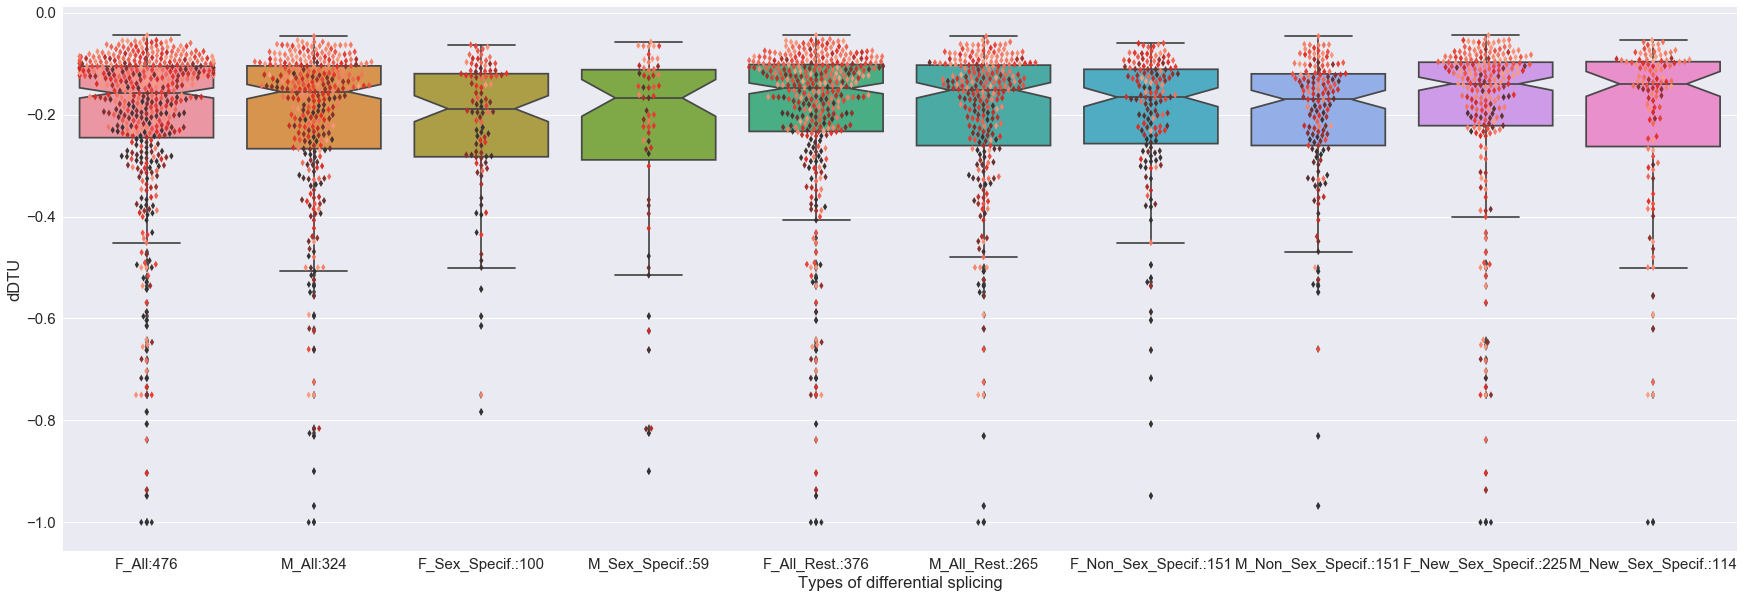

In [73]:
TIME="2_4"

for i in pos_neg:
    if i=="p": # positive set
        df_2_4f=df_2_4fp
        df_2_4m=df_2_4mp
    else: # negative set
        df_2_4f=df_2_4fn
        df_2_4m=df_2_4mn
        
    # All genes that are sex specific from controls
    df_2_4_cf_cm_filt = df_2_4_cf_cm[df_2_4_cf_cm[pvaldtu]<=0.05]
    controls_list_ss_filt = df_2_4_cf_cm_filt.index.values.tolist() 

    # keep only the rows in the controls_input_2_4_cf_cm to get sex specific
    df_2_4_f_ss = df_2_4f[df_2_4f.index.isin(controls_list_ss_filt)]
    df_2_4_m_ss = df_2_4m[df_2_4m.index.isin(controls_list_ss_filt)]

    # All other genes that are significant but not sex specific genes
    df_2_4_f_ar = df_2_4f[~df_2_4f.index.isin(controls_list_ss_filt)]
    df_2_4_m_ar = df_2_4m[~df_2_4m.index.isin(controls_list_ss_filt)]

    # New sex specific thus are significant but not in sex specifc list (thus diff. btw males and females in comparisons)
    df_2_4f_newss1 = df_2_4f[~df_2_4f.index.isin(controls_list_ss_filt)]
    df_2_4m_newss1 = df_2_4m[~df_2_4m.index.isin(controls_list_ss_filt)]

    df_2_4f_newss1_list = df_2_4f_newss1.index.values.tolist() 
    df_2_4m_newss1_list = df_2_4m_newss1.index.values[:-5000].tolist() 

    # venn of overlapping ss in f and m

    # 0-2 F vs. M all
    df_2_4f_filt = df_2_4f[df_2_4f[pvaldtu]<=0.05]
    df_2_4f_filt['sex'] = 'F_All:%s'%len(df_2_4f_filt)
    df_2_4m_filt = df_2_4m[df_2_4m[pvaldtu]<=0.05]
    df_2_4m_filt['sex'] = 'M_All:%s'%len(df_2_4m_filt)

    df1 = df_2_4f_filt.append(df_2_4m_filt)

    # 0-2 Sex specific thus control F vs. M for list then filter those genes
    df_2_4f_filt_ss = df_2_4_f_ss[df_2_4_f_ss[pvaldtu]<=0.05]
    df_2_4f_filt_ss['sex'] = 'F_Sex_Specif.:%s'%len(df_2_4f_filt_ss)
    df_2_4m_filt_ss = df_2_4_m_ss[df_2_4_m_ss[pvaldtu]<=0.05]
    df_2_4m_filt_ss['sex'] = 'M_Sex_Specif.:%s'%len(df_2_4m_filt_ss)

    df2 = df1.append(df_2_4f_filt_ss)
    df3 = df2.append(df_2_4m_filt_ss)

    # 0-2 All rest 
    df_2_4f_filt_ar = df_2_4_f_ar[df_2_4_f_ar[pvaldtu]<=0.05]
    df_2_4f_filt_ar['sex'] = 'F_All_Rest.:%s'%len(df_2_4f_filt_ar)
    df_2_4m_filt_ar = df_2_4_m_ar[df_2_4_m_ar[pvaldtu]<=0.05]
    df_2_4m_filt_ar['sex'] = 'M_All_Rest.:%s'%len(df_2_4m_filt_ar)

    df_2_4f_filt_ar_list = df_2_4f_filt_ar.index.values.tolist() 
    df_2_4m_filt_ar_list = df_2_4m_filt_ar.index.values.tolist() 

    df4 = df3.append(df_2_4f_filt_ar)
    df5 = df4.append(df_2_4m_filt_ar) 

    # Venn diagram between them
    venn2([set(df_2_4f_filt_ar_list), set(df_2_4m_filt_ar_list)],
          set_labels = ('Female sex-specific', 'Male sex-specific'))
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_venn_DTU.pdf")
    plt.show()

    # 0-2 NOT sex specific thus ~control F vs. M list then filter those genes
    df_2_4filt_nss_list = intersection(df_2_4f_filt_ar_list, df_2_4m_filt_ar_list)
    df_2_4f_filt_nss = df_2_4f_filt_ar[df_2_4f_filt_ar.index.isin(df_2_4filt_nss_list)]
    df_2_4f_filt_nss['sex'] = 'F_Non_Sex_Specif.:%s'%len(df_2_4f_filt_nss)
    df_2_4m_filt_nss = df_2_4m_filt_ar[df_2_4m_filt_ar.index.isin(df_2_4filt_nss_list)]
    df_2_4m_filt_nss['sex'] = 'M_Non_Sex_Specif.:%s'%len(df_2_4m_filt_nss)

    df6 = df5.append(df_2_4f_filt_nss)
    df7 = df6.append(df_2_4m_filt_nss)

    # 0-2 New sex specific thus ~control F vs. M list then filter those gene
    df_2_4f_filt_newss_list = list(set(df_2_4f_filt_ar_list) - set(df_2_4m_filt_ar_list))
    df_2_4f_filt_newss = df_2_4f_filt_ar[df_2_4f_filt_ar.index.isin(df_2_4f_filt_newss_list)]
    df_2_4f_filt_newss['sex'] = 'F_New_Sex_Specif.:%s'%len(df_2_4f_filt_newss)

    df_2_4m_filt_newss_list = list(set(df_2_4m_filt_ar_list) - set(df_2_4f_filt_ar_list))
    df_2_4m_filt_newss = df_2_4m_filt_ar[df_2_4m_filt_ar.index.isin(df_2_4m_filt_newss_list)]
    df_2_4m_filt_newss['sex'] = 'M_New_Sex_Specif.:%s'%len(df_2_4m_filt_newss)

    df8 = df7.append(df_2_4f_filt_newss)
    df9_2_4_dtu = df8.append(df_2_4m_filt_newss)

    #### Plots 
    sns.set(style="whitegrid")
    # Make boxplot for one group only
    sns.set(font_scale = 1.5)
    f = plt.figure(figsize=(30,10))
    ax = f.add_subplot(111)
    #pal = sns.palplot(sns.light_palette("navy", reverse=True))

    sns.set_palette("Paired")
    sns.violinplot( x="sex", y=DTU, data=df9_2_4_dtu)

    # sequential_colors = sns.color_palette("RdPu", 100)
    # sns.palplot(sequential_colors)

    sns.swarmplot( x="sex", y=DTU, color='red', marker="d", hue=pvaldtu, data=df9_2_4_dtu, palette="Reds_d")
    ax.get_legend().set_visible(False)
    ax.set(xlabel='Types of differential splicing', ylabel='dDTU')
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_violin_DTU.pdf")
    sns.plt.show()

    sns.set(style="whitegrid")
    # Make boxplot for one group only
    sns.set(font_scale = 1.5)
    f = plt.figure(figsize=(30,10))
    ax = f.add_subplot(111)
    #pal = sns.palplot(sns.light_palette("navy", reverse=True))

    sns.set_palette("Paired")
    sns.boxplot( x="sex", y=DTU, data=df9_2_4_dtu, notch="TRUE")

    sns.swarmplot( x="sex", y=DTU, color='red', marker="d", hue=pvaldtu, data=df9_2_4_dtu, palette="Reds_d")
    ax.get_legend().set_visible(False)
    ax.set(xlabel='Types of differential splicing', ylabel='dDTU')
    plt.savefig(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_boxplot_DTU.pdf")
    sns.plt.show()

    #### K-S Tests
    with open(OUTDIR_BOX+"/"+TIME+"_"+i+"_"+"_ksTest_DTU.txt", 'w') as f:
        # All
        DTU_f_all = np.asarray(df_2_4f_filt[DTU])
        DTU_m_all = np.asarray(df_2_4m_filt[DTU])
        print >> f, "All K-S Test: ", stats.ks_2samp(DTU_f_all, DTU_m_all)

        # Sex specific
        DTU_f_ss = np.asarray(df_2_4f_filt_ss[DTU])
        DTU_m_ss = np.asarray(df_2_4m_filt_ss[DTU])
        print >> f, "Sex specific K-S Test: ", stats.ks_2samp(DTU_f_ss, DTU_m_ss)

        # All rest
        DTU_f_ar = np.asarray(df_2_4f_filt_ar[DTU])
        DTU_m_ar = np.asarray(df_2_4m_filt_ar[DTU])
        print >> f, "All rest K-S Test: ", stats.ks_2samp(DTU_f_ar, DTU_m_ar)

        # Non-sex specif.
        DTU_f_nss = np.asarray(df_2_4f_filt_nss[DTU])
        DTU_m_nss = np.asarray(df_2_4m_filt_nss[DTU])
        print >> f, "Non-sex specific K-S Test: ", stats.ks_2samp(DTU_f_nss, DTU_m_nss)

        # New sex specif.
        DTU_f_newss = np.asarray(df_2_4f_filt_newss[DTU])
        DTU_m_newss = np.asarray(df_2_4m_filt_newss[DTU])
        print >> f, "New sex specific K-S Test: ", stats.ks_2samp(DTU_f_newss, DTU_m_newss)

# Lineplots

In [15]:
# PSI 0-4
df9_0_2_psi['time'] = 0
df9_0_2_psi_ind = df9_0_2_psi.insert(0, 'New_ID', range(0, 0 + len(df9_0_2_psi)))
df9_2_4_psi['time'] = 2
df9_2_4_psi_ind = df9_2_4_psi.insert(0, 'New_ID', range(0, 0 + len(df9_2_4_psi)))
df_0_4_psi = df9_0_2_psi.append(df9_2_4_psi)

ValueError: Could not interpret input 'new_sex'

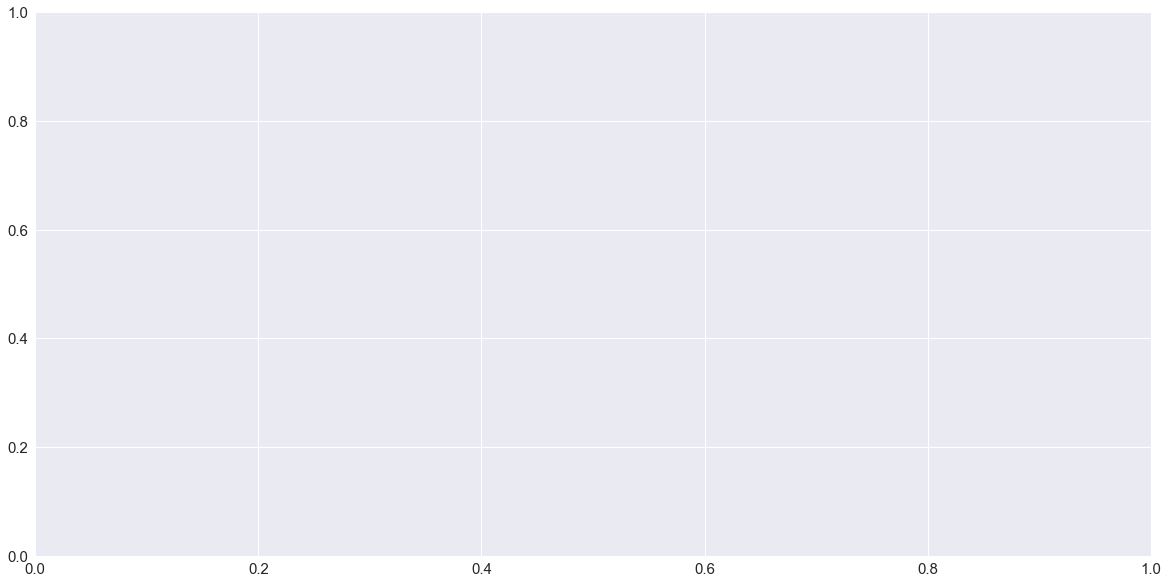

In [35]:
sns.set(style="whitegrid")
# Make boxplot for one group only
sns.set(font_scale = 1.5)
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(111)

sns.pointplot(x="time", y=PSI, data=df_0_4_psi, hue="new_sex", dodge=True, join=True, legend_out = True)

#ax.get_legend().set_visible(False)
ax.set(xlabel='Types of differential splicing', ylabel='dPSI')
sns.plt.show()

In [28]:
# DTU 0-4
df9_0_2_dtu['time'] = 0
df9_0_2_dtu_ind = df9_0_2_dtu.insert(0, 'New_ID', range(0, 0 + len(df9_0_2_dtu)))
df9_2_4_dtu['time'] = 2
df9_2_4_dtu_ind = df9_2_4_dtu.insert(0, 'New_ID', range(0, 0 + len(df9_2_4_dtu)))
df_0_4_dtu = df9_0_2_dtu.append(df9_2_4_dtu)

# Formatting the genes.gtf file

In [18]:
# IMPORTING GENES.GTF FILE 
df_genes_gtf = pd.read_csv(GENES_GTF, sep="\t",usecols=[0,2,3,4,8], names=['chrom','type_prot', 'start_chrom', 
                                                       'end_chrom', 'allInfo'], engine='python')
df_genes_gtf['allInfo'] = df_genes_gtf['allInfo'].map(lambda x: str(x)[:-1])
df_genes_gtf.columns.str.replace(' ', '')
list_cols =["gene_name", "gene_biotype", "gene_id", "transcript_name", "transcript_id","transcript_biotype", "tss_id"]

print "Example of 'allInfo' column in df_genes_gtf['allInfo'] that I will parse into these columns: \n\n", list_cols,"\n\n", df_genes_gtf["allInfo"][0]

Example of 'allInfo' column in df_genes_gtf['allInfo'] that I will parse into these columns: 

['gene_name', 'gene_biotype', 'gene_id', 'transcript_name', 'transcript_id', 'transcript_biotype', 'tss_id'] 

exon_id "FBtr0114187-E1"; exon_number "1"; exon_version "1"; gene_biotype "rRNA"; gene_id "FBgn0085737"; gene_name "CR40502"; gene_source "FlyBase"; gene_version "1"; transcript_biotype "rRNA"; transcript_id "FBtr0114187"; transcript_name "CR40502-RA"; transcript_source "FlyBase"; transcript_version "1"; tss_id "TSS6218"


In [20]:
# FORMATTING GENES.GTF FILE 
def create_cols(row):
    string = row['allInfo']
    list_of_words = string.split()
    next_word = list_of_words[list_of_words.index(search_word) + 1]  
    return(next_word)

# iterate through all gene information (from allInfo in df_genes_gtf of genes.gtf) to keep
for search_word in list_cols:
    df_genes_gtf[search_word] = df_genes_gtf.apply(create_cols,axis=1)
    df_genes_gtf[search_word] = df_genes_gtf[search_word].str.replace(';','')
    df_genes_gtf[search_word] = df_genes_gtf[search_word].str.replace('"', '')
    
#df_genes_gtf = df_genes_gtf.drop(columns=['allInfo'])
df_genes_gtf = df_genes_gtf.drop_duplicates(subset="gene_id")
df_genes_gtf = df_genes_gtf.reset_index()
print("Number of unique genes based on FlyBase ID from ", GENES_GTF,": ", len(df_genes_gtf))

('Number of unique genes based on FlyBase ID from ', '/Users/ashleymaeconard/Desktop/0-2_2-4_EE/genes.gtf', ': ', 17558)


In [21]:
def add_exon_id(row):
    string = row['allInfo'] 
    if "exon_id" in string:
        return(string.split( )[1].strip('"').strip('"').strip(";").strip('"'))
    else:
        return("NA")
def add_exon_number(row):
    string = row['allInfo'] 
    if "exon_number" and not"exon_id" in string:
        return(string.split( )[1].strip('"').strip('"').strip(";").strip('"'))
    elif "exon_number" in string:
        return(string.split( )[3].strip('"').strip('"').strip(";").strip('"'))
    else:
        return("NA")
    
df_genes_gtf["exon_id"]=df_genes_gtf.apply(add_exon_id, axis=1)
df_genes_gtf["exon_number"]=df_genes_gtf.apply(add_exon_number, axis=1)
df_genes_gtf = df_genes_gtf.reset_index()
df_genes_gtf = df_genes_gtf.drop(['allInfo','index'], axis=1)

In [24]:
# Add gene_name to output files for PSI and DTU for each timepoint 0-2 and 2-4

def parse_index(row):
    string = row.name
    list_of_words = string.split(";") 
    return(list_of_words[0])

# df9_0_2_psi
df9_0_2_psi['gene_id']= df9_0_2_psi.apply(parse_index,axis=1)
df9_0_2_psi['trans_event'] = df9_0_2_psi.index
df9_0_2_psi.index = df9_0_2_psi['New_ID']
df9_0_2_psi = df9_0_2_psi.drop(['New_ID'], axis=1)
new_df9_0_2_psi = pd.merge(df9_0_2_psi, df_genes_gtf[['gene_id','gene_name', 'gene_biotype']], on='gene_id')

cols = list(new_df9_0_2_psi)
cols.insert(0, cols.pop(cols.index('gene_name')))
new_df9_0_2_psi = new_df9_0_2_psi.ix[:, cols]
new_df9_0_2_psi.to_csv(OUTDIR_BOX+"/df9_0_2_psi.tsv", sep="\t", index=False)

# df9_2_4_psi
df9_2_4_psi['gene_id']= df9_2_4_psi.apply(parse_index,axis=1)
df9_2_4_psi['trans_event'] = df9_2_4_psi.index
df9_2_4_psi.index = df9_2_4_psi['New_ID']
df9_2_4_psi = df9_2_4_psi.drop(['New_ID'], axis=1)
new_df9_2_4_psi = pd.merge(df9_2_4_psi, df_genes_gtf[['gene_id','gene_name', 'gene_biotype']], on='gene_id')

cols = list(new_df9_2_4_psi)
cols.insert(0, cols.pop(cols.index('gene_name')))
new_df9_2_4_psi = new_df9_2_4_psi.ix[:, cols]
new_df9_2_4_psi.to_csv(OUTDIR_BOX+"/df9_2_4_psi.tsv", sep="\t", index=False)

NameError: name 'new_df9_0_2_psi' is not defined

In [31]:
# df9_0_2_dtu
df9_0_2_dtu['gene_id']= df9_0_2_dtu.apply(parse_index,axis=1)
df9_0_2_dtu['trans_event'] = df9_0_2_dtu.index
df9_0_2_dtu.index = df9_0_2_dtu['New_ID']
new_df9_0_2_dtu = pd.merge(df9_0_2_dtu, df_genes_gtf[['gene_id','gene_name', 'gene_biotype']], on='gene_id')

cols = list(new_df9_0_2_dtu)
cols.insert(0, cols.pop(cols.index('gene_name')))
new_df9_0_2_dtu = new_df9_0_2_dtu.ix[:, cols]
new_df9_0_2_dtu.to_csv(OUTDIR_BOX+"/df9_0_2_dtu.tsv", sep="\t", index=False)

# df9_2_4_dtu
df9_2_4_dtu['gene_id']= df9_2_4_dtu.apply(parse_index,axis=1)
df9_2_4_dtu['trans_event'] = df9_2_4_dtu.index
df9_2_4_dtu.index = df9_2_4_dtu['New_ID']
new_df9_2_4_dtu = pd.merge(df9_2_4_dtu, df_genes_gtf[['gene_id','gene_name', 'gene_biotype']], on='gene_id')

cols = list(new_df9_2_4_dtu)
cols.insert(0, cols.pop(cols.index('gene_name')))
new_df9_2_4_dtu = new_df9_2_4_dtu.ix[:, cols]
new_df9_2_4_dtu.to_csv(OUTDIR_BOX+"/df9_2_4_dtu.tsv", sep="\t", index=False)

AttributeError: ("'numpy.int64' object has no attribute 'split'", u'occurred at index 0')

In [ ]:
print(list(df9_0_2_psi))
print(list(df9_2_4_psi))
print(list(df9_0_2_dtu))
print(list(df9_2_4_dtu))
   if counter==1:
        
    elif counter==2:
        # PSI
        df9_2_4_psi.to_csv(OUTDIR_BOX+"/df9_2_4_psi.tsv", sep="\t")
    elif counter==3:
        # DTU
        df9_0_2_dtu.to_csv(OUTDIR_BOX+"/df9_0_2_dtu.tsv", sep="\t")
    else:
        df9_2_4_dtu.to_csv(OUTDIR_BOX+"/df9_2_4_dtu.tsv", sep="\t"